*Remarque liminaire: Python conduit a des résultats identiques à ceux de R, moins complets pour leur interprétation, mais plus rapidement. Il s'agit des principales différences entre R pour "statisticien" et python pour "informaticien", on perd en interprétabilité mais on gagne en vitesse d'exécution.*

# Analyse en composantes principales et classification


#### Accès rapide aux différentes sections:
* [1 Prétraitement des données](#pretraitement)
* [2 Exploration des données](#exploration)
* [3 Analyse en composantes principales](#acp)
* [4 Classification](#cah)



## Introduction

L'objectif de ce TP est de mettre en oeuvre l'ACP et la CAH sur des données économiques, provenant de la base de données "Air Transport Data", gérée maintenant par France Aviation Civile Service.
La première partie consiste à pré-traiter les données (gestion du type des variables, des données manquantes) et à faire de l'exploration des données (statistique descriptive). La deuxième partie consiste à faire une ACP et à l'interpréter. La troisième partie consiste à faire de la classification.

### Description des données

Elles sont décrites par les variables suivantes:

| Variables      | |    Variables (suite) |
| :------------- |-------- | :------------- | 
 Year 	| | Tonne-Kilometres Performed (thousands)	
Airline | | Passenger Load Factor (%)
Code 	| | Period Fin.	
Al Code ICAO 	 || Currency (000)	
    Country 	| | Operating Revenue	
Country Code OAG 	| | Operating Revenue Pax (000)	
Country Code IATA 	 |  | Operating Expenses	
IATA Regions 	| | Operating Profit	
Passengers Carried (number) 	| | Net Result	
Kilometres Flown (thousands) 	| | Employees	
Aircraft Departures (number)	| | Traf. Source	
Hours Flown (number)	| | Fin Source	
Passenger-Kilometres Flown (thousands)	| | Pers. Source	
Available Seat-Kilometres (thousands)	| | Year End










### Importation des données

In [1]:
# Classe pour la mise en forme de l'affichage de certaines sorties
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
couleur_plot=["grey", "blue","green","cyan","magenta","yellow","red","black"]

import pandas as pd
import numpy as np
# Lecture des données
path = ""
airlines = pd.read_csv(path + "Airlines20062015NA.csv", sep = ";", header = 0)
#airlines = pd.read_csv(path + "AnaDo_JeuDonnees_TemperatFrance.csv", sep = ";", header = 0, encoding='latin-1')
#airlines_df=airlines.set_index('Villes')
# Nombre d'observations
n = airlines.shape[0]
# Nombre de variables
p = airlines.shape[1]
# Vérification du contenu
airlines.head()

,Year,Airline,Code,Al Code ICAO,Country,Country Code OAG,Country Code IATA,IATA Regions,Passengers Carried,Kilometres Flown,...,Operating Revenue Pax,Operating Expenses,Operating Profit,Net Result,Employees,Traf. Source,Fin Source,Pers. Source,Year End,Remarques
0,2006,AER LINGUS,EI,EIN,IRISH REPUBLIC,441.0,IRLD,Europe,8632000.0,78000.0,...,1280000.0,1389600.0,40900.0,-88000.0,3556.0,Al Monitor 10/07,Al Monitor 10/07,IATA,31.12,NaN
1,2007,AER LINGUS,EI,EIN,IRISH REPUBLIC,441.0,IRLD,Europe,9305000.0,89000.0,...,1546000.0,1646000.0,122000.0,145000.0,3617.0,Al Monitor 10/08,Al Monitor 10/08,Internet 10/08,31.12,NaN
2,2008,AER LINGUS,EI,EIN,IRISH REPUBLIC,441.0,IRLD,Europe,10001000.0,102000.0,...,1692000.0,2020000.0,-26000.0,-157400.0,4035.0,Al Monitor 10/15,Al Monitor 10/15/,Internet 10/09,31.12,NaN
3,2009,AER LINGUS,EI,EIN,IRISH REPUBLIC,441.0,IRLD,Europe,10382000.0,100000.0,...,1382000.0,1843500.0,-116100.0,-186400.0,3844.0,Al Monitor 10/10,Al Monitor 10/10,Internet,31.12,NaN
4,2010,AER LINGUS,EI,EIN,IRISH REPUBLIC,441.0,IRLD,Europe,9346000.0,87000.0,...,1321000.0,1536000.0,69000.0,57000.0,3516.0,Al Monitor 10/12,Al Monitor 10/12,Internet 11/11,31.12,NaN


<hr style="height:2px" />

## 1 Pré-traitement des données <a class="anchor" id="pretraitement"></a>

Même si ces données sont relativement bien formatées, il faut les explorer pour pouvoir corriger d'éventuels problèmes d'importation, comme le type de données et les données manquantes.

**Q** Combien y a-t-il d'individus? de variables?


In [3]:
n_individus, n_variables = airlines.shape # n, p
print(f"Il y a {n_individus} individus et {n_variables} variables !")

Il y a 838 individus et 29 variables !



### 1.1 Typage des variables

In [4]:
print(airlines.dtypes)
#airlines.describe()
#airlines.describe().shape[1]

Year                            int64
Airline                        object
Code                           object
Al Code ICAO                   object
Country                        object
Country Code OAG              float64
Country Code IATA              object
IATA Regions                   object
Passengers Carried            float64
Kilometres Flown              float64
Aircraft Departures           float64
Hours Flown                   float64
Passenger-Kilometres Flown    float64
Available Seat-Kilometres     float64
Tonne-Kilometres Performed    float64
Passenger Load Factor         float64
Period Fin                     object
Currency                       object
Operating Revenue             float64
Operating Revenue Pax         float64
Operating Expenses            float64
Operating Profit              float64
Net Result                    float64
Employees                     float64
Traf. Source                   object
Fin Source                     object
Pers. Source

**Q** Combien y a-t-il de variables quantitatives ? qualitatives ?

In [15]:
counts = airlines.dtypes.value_counts()
n_quantitatives = counts[0] + counts[-1]
n_qualitatives = counts[1]
print(f"Il y a {n_quantitatives} variables quantitatives et {n_qualitatives} variables qualitatives")

Il y a 17 variables quantitatives et 12 variables qualitatives


**Q** Quel est le problème avec les variables qualitatives? Et plus particulièrement avec la variable "OAG"?

In [16]:
#airlines["Country Code OAG"] = pd.Categorical(airlines["Country Code OAG"], ordered = False)
airlines['Country Code OAG'] = airlines['Country Code OAG'].astype('object')
# convert the 'Date' column to datetime format
airlines['Year End'] = airlines['Year End'].astype('object')
print(airlines.dtypes)

# Vérification du contenu
airlines.head()

Year                            int64
Airline                        object
Code                           object
Al Code ICAO                   object
Country                        object
Country Code OAG               object
Country Code IATA              object
IATA Regions                   object
Passengers Carried            float64
Kilometres Flown              float64
Aircraft Departures           float64
Hours Flown                   float64
Passenger-Kilometres Flown    float64
Available Seat-Kilometres     float64
Tonne-Kilometres Performed    float64
Passenger Load Factor         float64
Period Fin                     object
Currency                       object
Operating Revenue             float64
Operating Revenue Pax         float64
Operating Expenses            float64
Operating Profit              float64
Net Result                    float64
Employees                     float64
Traf. Source                   object
Fin Source                     object
Pers. Source

,Year,Airline,Code,Al Code ICAO,Country,Country Code OAG,Country Code IATA,IATA Regions,Passengers Carried,Kilometres Flown,...,Operating Revenue Pax,Operating Expenses,Operating Profit,Net Result,Employees,Traf. Source,Fin Source,Pers. Source,Year End,Remarques
0,2006,AER LINGUS,EI,EIN,IRISH REPUBLIC,441.0,IRLD,Europe,8632000.0,78000.0,...,1280000.0,1389600.0,40900.0,-88000.0,3556.0,Al Monitor 10/07,Al Monitor 10/07,IATA,31.12,NaN
1,2007,AER LINGUS,EI,EIN,IRISH REPUBLIC,441.0,IRLD,Europe,9305000.0,89000.0,...,1546000.0,1646000.0,122000.0,145000.0,3617.0,Al Monitor 10/08,Al Monitor 10/08,Internet 10/08,31.12,NaN
2,2008,AER LINGUS,EI,EIN,IRISH REPUBLIC,441.0,IRLD,Europe,10001000.0,102000.0,...,1692000.0,2020000.0,-26000.0,-157400.0,4035.0,Al Monitor 10/15,Al Monitor 10/15/,Internet 10/09,31.12,NaN
3,2009,AER LINGUS,EI,EIN,IRISH REPUBLIC,441.0,IRLD,Europe,10382000.0,100000.0,...,1382000.0,1843500.0,-116100.0,-186400.0,3844.0,Al Monitor 10/10,Al Monitor 10/10,Internet,31.12,NaN
4,2010,AER LINGUS,EI,EIN,IRISH REPUBLIC,441.0,IRLD,Europe,9346000.0,87000.0,...,1321000.0,1536000.0,69000.0,57000.0,3516.0,Al Monitor 10/12,Al Monitor 10/12,Internet 11/11,31.12,NaN


### 1.2 Gestion des valeurs manquantes

#### 1.2.1 Détection des valeurs manquantes

In [17]:
# Y a-t-il des valeurs manquantes
print(airlines.isnull().values.any())
print()
# Nombre de valeurs manquantes pour chaque variable
print(airlines.isnull().sum())
print()
# Nombre totale de valeurs manquantes dans le dataframe
print("Nombre total de valeurs manquantes:",airlines.isnull().sum().sum())

True

Year                            0
Airline                         0
Code                            0
Al Code ICAO                   30
Country                         0
Country Code OAG              159
Country Code IATA               0
IATA Regions                    0
Passengers Carried             21
Kilometres Flown               59
Aircraft Departures            59
Hours Flown                    59
Passenger-Kilometres Flown     20
Available Seat-Kilometres      20
Tonne-Kilometres Performed     71
Passenger Load Factor          20
Period Fin                     10
Currency                       10
Operating Revenue              11
Operating Revenue Pax          34
Operating Expenses             48
Operating Profit               48
Net Result                     61
Employees                      16
Traf. Source                    0
Fin Source                     10
Pers. Source                   16
Year End                       10
Remarques                     722
dtype: i

**Q** Commenter les résultats précédents. Y a-t-il des variables que l'on peut éliminer de l'étude?


#### 1.2.2 Gestion des valeurs manquantes par suppression d'individus ou de variables

In [18]:
# Taille de la dataframe de départ
print("Dimension du jeu de données", airlines.shape)

# Supprimer les individus ou lignes qui possèdent des valeurs manquantes
airlines0 = airlines.dropna(axis = 0)
print("Dimensions sans les individus avec données manquantes", airlines0.shape)

# Supprimer les variables ou colonnes qui possèdent des valeurs manquantes
airlines1 = airlines.dropna(axis = 1)
print("Dimensions sans les variables avec données manquantes", airlines1.shape)

# Supprimer les colonnes dont le nombre de valeurs manquantes est supérieur à 50%
airlines2 = airlines.loc[:, airlines.isnull().sum() < (0.5*n)]
print('Dimensions sans les colonnes ayant + de 50% de données manquantes: ',airlines2.shape)

Dimension du jeu de données (838, 29)
Dimensions sans les individus avec données manquantes (69, 29)
Dimensions sans les variables avec données manquantes (838, 7)
Dimensions sans les colonnes ayant + de 50% de données manquantes:  (838, 28)


#### 1.2.3 Gestion des valeurs manquantes par imputation

In [23]:
# Imputation par la moyenne
airlines3 = airlines.fillna(airlines.mean(axis=None, numeric_only=True))
print("Dimensions avec imputation des données manquantes", airlines3.shape)

# Imputation par la médiane
airlines4 = airlines.fillna(airlines.median(axis=None, numeric_only=True))
print("Dimensions avec imputation des données manquantes", airlines4.shape)


Dimensions avec imputation des données manquantes (838, 29)
Dimensions avec imputation des données manquantes (838, 29)


**Q** Parmi les 5 jeux de données précédents (airlines0-4), le(s)quel(s) choisiriez-vous pour la suite de l'étude? Expliquer pourquoi.

<hr style="height:2px" />

## 2 Exploration des données <a class="anchor" id="exploration"></a>

Pour la suite, on décide de ne travailler qu'avec les années 2015.

In [24]:
airlines15 = airlines.query('Year == 2015')

airlines2015 = airlines15.set_index('Airline')
del airlines2015['Year']
airlines2015.head()

,Code,Al Code ICAO,Country,Country Code OAG,Country Code IATA,IATA Regions,Passengers Carried,Kilometres Flown,Aircraft Departures,Hours Flown,...,Operating Revenue Pax,Operating Expenses,Operating Profit,Net Result,Employees,Traf. Source,Fin Source,Pers. Source,Year End,Remarques
Airline,,,,,,,,,,,,,,,,,,,,,
AER LINGUS,EI,EIN,IRISH REPUBLIC,441.0,IRLD,Europe,10149000.0,104000.0,72000.0,173200.0,...,1795000.0,1758000.0,137000.0,NaN,4000.0,Al Monitor 10/16,Al Monitor 10/16,Internet 09/16,31.12,NaN
AEROFLOT RUSSIAN AL,SU,AFL,RUSSIAN FEDERATION,475.0,RUSF,Europe,26106000.0,468000.0,206400.0,594600.0,...,5640000.0,5986000.0,712000.0,-105000.0,20404.0,Al Monitor 10/16,Al Monitor 10/16,IATA,31.12,NaN
AEROLINEAS ARGENTINAS,AR,ARG,ARGENTINA,303.0,ARGT,South America,7464000.0,119000.0,64600.0,180100.0,...,1700000.0,1861000.0,223000.0,-192000.0,10491.0,Al Monitor 10/16,Al Monitor 10/16,IATA,31.12,NaN
AEROMEXICO,AM,AMX,MEXICO,148.0,MEXC,Central America/Caribbean,10408000.0,184000.0,85600.0,294500.0,...,2612000.0,2748000.0,190000.0,72000.0,6612.0,Al Monitor 10/16,Al Monitor 10/16,IATA,31.12,NaN
AIR CANADA,AC,ACA,CANADA,900.0,CAND,North America,23618000.0,500000.0,182400.0,725800.0,...,9624000.0,9587000.0,1159000.0,239000.0,23301.0,Al Monitor 10/16,Al Monitor 10/16,IATA,31.12,NaN


In [25]:
print(airlines2015.isnull().sum())

Code                           0
Al Code ICAO                   4
Country                        0
Country Code OAG              15
Country Code IATA              0
IATA Regions                   0
Passengers Carried             2
Kilometres Flown               5
Aircraft Departures            5
Hours Flown                    5
Passenger-Kilometres Flown     2
Available Seat-Kilometres      2
Tonne-Kilometres Performed     8
Passenger Load Factor          2
Period Fin                     1
Currency                       1
Operating Revenue              1
Operating Revenue Pax          3
Operating Expenses             7
Operating Profit               7
Net Result                    10
Employees                      2
Traf. Source                   0
Fin Source                     1
Pers. Source                   2
Year End                       1
Remarques                     76
dtype: int64


### 2.1 Statistique descriptive univariée

#### 2.1.1 Statistique quantitative

In [26]:
airlines2015.describe()

,Passengers Carried,Kilometres Flown,Aircraft Departures,Hours Flown,Passenger-Kilometres Flown,Available Seat-Kilometres,Tonne-Kilometres Performed,Passenger Load Factor,Operating Revenue,Operating Revenue Pax,Operating Expenses,Operating Profit,Net Result,Employees
count,8.000000e+01,7.700000e+01,7.700000e+01,7.700000e+01,8.000000e+01,8.000000e+01,7.400000e+01,80.0000,8.100000e+01,7.900000e+01,7.500000e+01,7.500000e+01,7.200000e+01,80.000000
mean,3.168966e+07,1.149494e+06,2.566273e+05,6.262325e+05,6.663435e+07,8.242888e+07,8.309068e+06,79.7425,7.386604e+06,5.820700e+06,6.832689e+06,8.094013e+05,5.895000e+05,22059.525000
std,3.159314e+07,6.316515e+06,2.578104e+05,6.003003e+05,6.740135e+07,8.136822e+07,8.264981e+06,5.4603,7.907849e+06,6.359389e+06,6.934010e+06,1.397202e+06,1.451433e+06,27639.831222
min,2.877000e+06,6.400000e+04,2.750000e+04,1.101000e+03,7.081000e+06,9.102000e+06,4.570000e+05,66.5000,8.000000e+05,2.300000e+05,8.070000e+05,-3.390000e+05,-1.263000e+06,1697.000000
25%,1.113075e+07,1.820000e+05,8.560000e+04,2.587000e+05,2.704600e+07,3.355650e+07,2.651250e+06,76.8000,2.370000e+06,1.953000e+06,2.155500e+06,1.355000e+05,1.525000e+04,7228.000000
50%,2.326350e+07,2.940000e+05,1.705000e+05,4.263000e+05,3.853750e+07,4.920650e+07,5.096000e+06,80.3500,4.300000e+06,3.136000e+06,3.991000e+06,2.990000e+05,1.800000e+05,11746.500000
75%,3.538975e+07,5.000000e+05,3.178000e+05,7.258000e+05,7.900375e+07,1.022088e+08,1.102750e+07,83.5250,9.061000e+06,7.160000e+06,9.406500e+06,8.790000e+05,6.575000e+05,22973.250000
max,1.465500e+08,5.573400e+07,1.249500e+06,2.974600e+06,3.207440e+08,3.848880e+08,3.627500e+07,92.6000,3.546630e+07,2.902280e+07,2.865180e+07,7.819900e+06,7.610000e+06,154316.000000


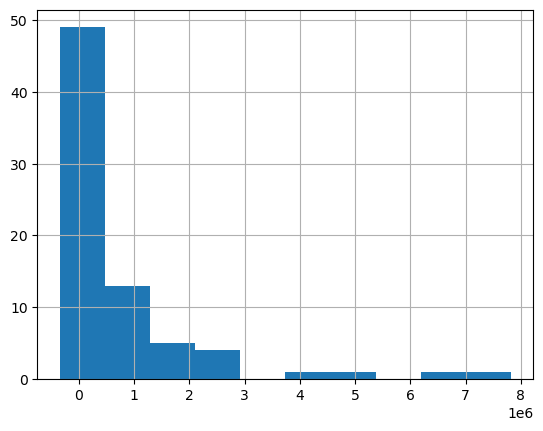

<AxesSubplot:>

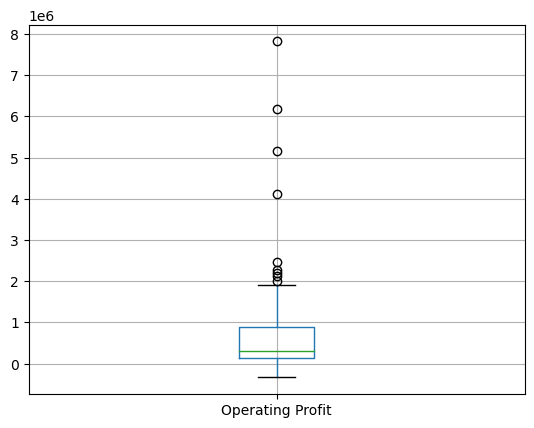

In [27]:
import matplotlib.pyplot as plt

# Histogramme de la variable 'Operating Profit'
airlines2015["Operating Profit"].hist()
plt.show()

# Boite à moustache de la variable 'Operating Profit'
airlines2015.boxplot(column=["Operating Profit"])

**Q** Etudier d'autres variables quantitatives.

Index(['Code', 'Al Code ICAO', 'Country', 'Country Code OAG',
       'Country Code IATA', 'IATA Regions', 'Passengers Carried',
       'Kilometres Flown', 'Aircraft Departures', 'Hours Flown',
       'Passenger-Kilometres Flown', 'Available Seat-Kilometres',
       'Tonne-Kilometres Performed', 'Passenger Load Factor', 'Period Fin',
       'Currency', 'Operating Revenue', 'Operating Revenue Pax',
       'Operating Expenses', 'Operating Profit', 'Net Result', 'Employees',
       'Traf. Source', 'Fin Source', 'Pers. Source', 'Year End', 'Remarques'],
      dtype='object')


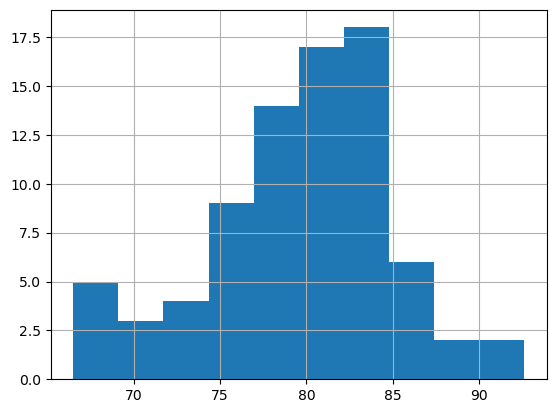

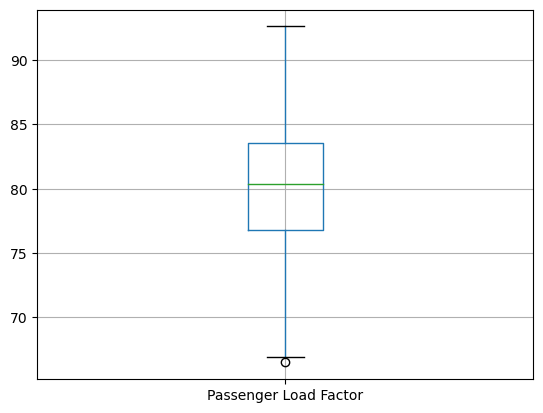

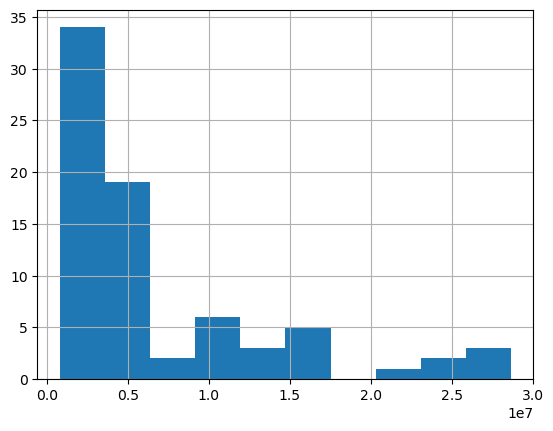

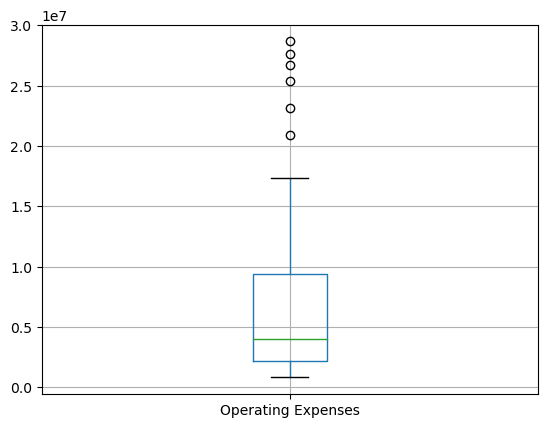

In [36]:
variables = airlines2015.columns
print(variables)

# Histogramme de la variable 'Passenger Load Factor'
airlines2015["Passenger Load Factor"].hist()
plt.show()

# Boite à moustache de la variable 'Passenger Load Factor'
airlines2015.boxplot(column=["Passenger Load Factor"])
plt.show()

# Histogramme de la variable 'Operating Expenses'
airlines2015["Operating Expenses"].hist()
plt.show()

# Boite à moustache de la variable 'Operating Expenses'
airlines2015.boxplot(column=["Operating Expenses"])
plt.show()

#### 2.1.2 Variables qualitatives

col_0              freq
Country Code IATA      
ARGT                 10
ASTL                 20
AUST                 10
BAHR                 10
BRAZ                 20
CAND                 20
CHIL                 10
CHIN                 50
COLM                  4
EGYP                 10
FINL                 10
FRAN                 10
GERF                 20
HONG                 10
INDA                 30
INDO                 20
IRLD                 20
ISRL                 10
ITAL                 10
JAPN                 20
JORD                 10
KORR                 20
MALB                 20
MEXC                 10
MORC                 10
NETH                 10
NEWZ                 10
NORW                 10
PAKI                 10
PANM                 16
PHIL                 10
POLD                 10
PORT                 10
QATR                 10
RUSF                 19
SAUD                 10
SING                 10
SOUF                 10
SPAN                 20
SWED            

array([<AxesSubplot:ylabel='freq'>], dtype=object)

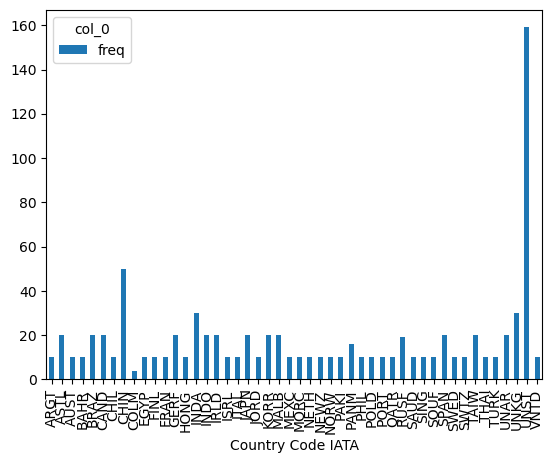

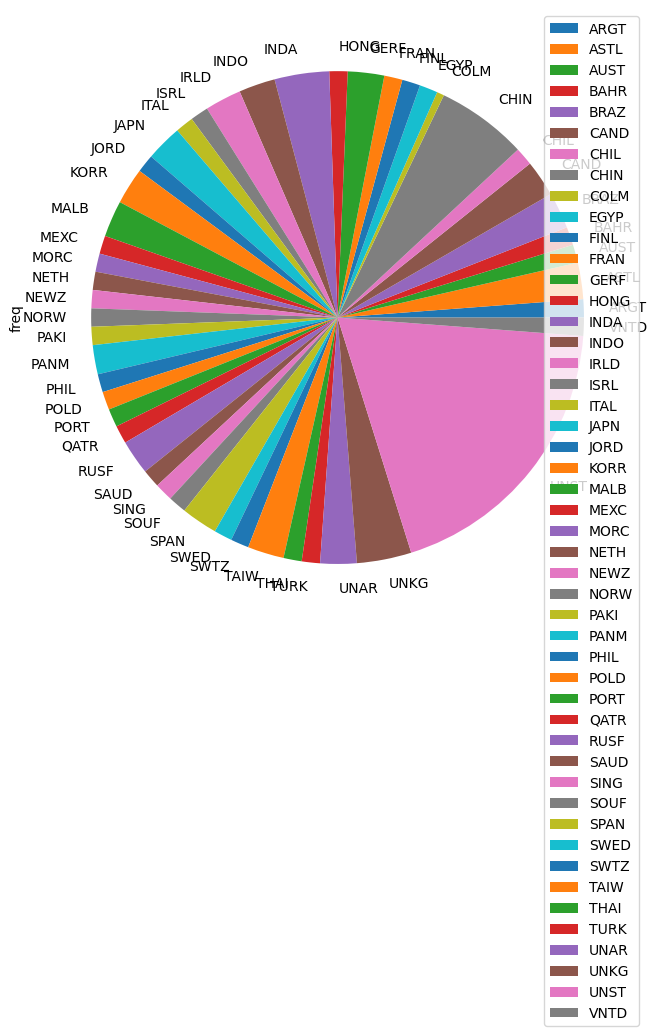

In [39]:
# Fréquence des valeurs pou 'Country Code IATA'
freq_country= pd.crosstab(airlines["Country Code IATA"], "freq")
print(freq_country)

# Diagramme en bâtons de 'Country Code IATA'
freq_country.plot.bar()

# Camembert (à ne surtout pas faire car illisible!)
freq_country.plot.pie(subplots=True, figsize = (8, 8))

**Q** Etudier d'autres variables qualitatives.

col_0  freq
Year       
2006     83
2007     84
2008     84
2009     86
2010     85
2011     84
2012     84
2013     83
2014     83
2015     82


array([<AxesSubplot:ylabel='freq'>], dtype=object)

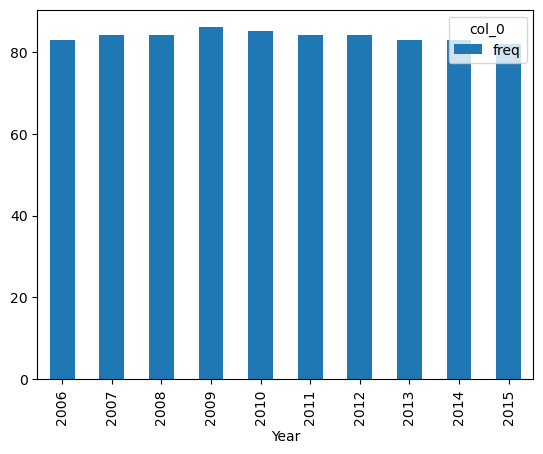

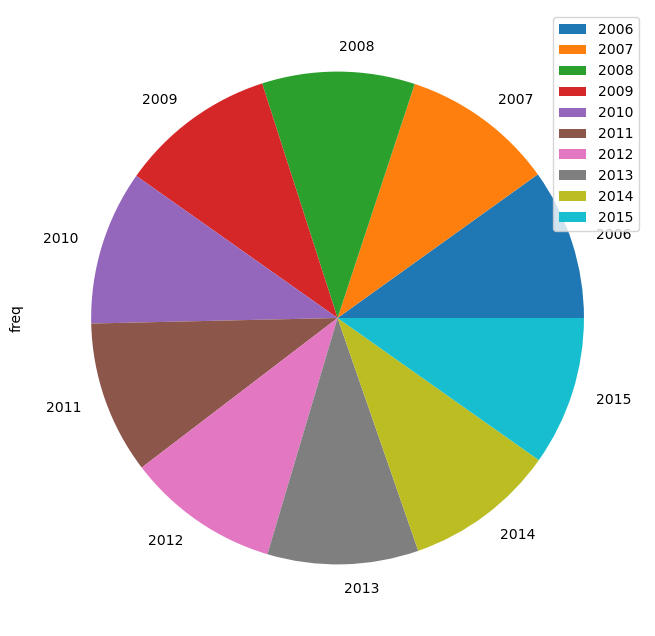

In [40]:
# Fréquence des valeurs pou 'Year'
freq_year = pd.crosstab(airlines["Year"], "freq")
print(freq_year)

# Diagramme en bâtons de 'Year'
freq_year.plot.bar()

# Camembert (à ne surtout pas faire car illisible!)
freq_year.plot.pie(subplots=True, figsize = (8, 8))



### 2.2 Statistiques descriptives multivariées

#### 2.2.1 Statistiques quantitatives

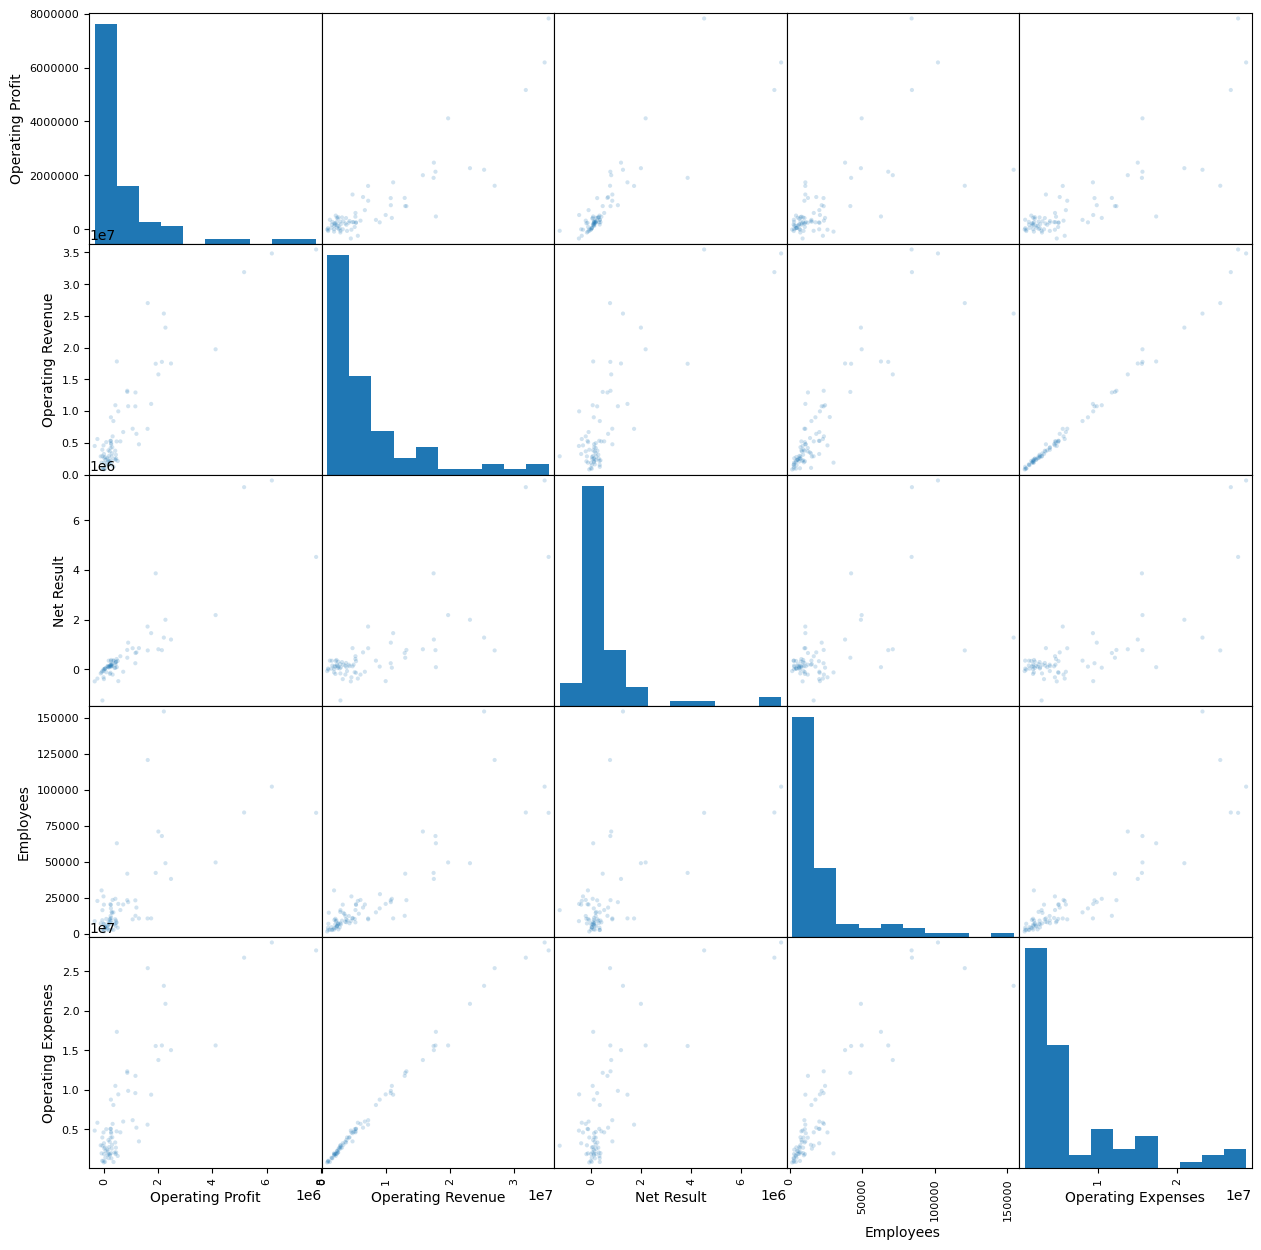

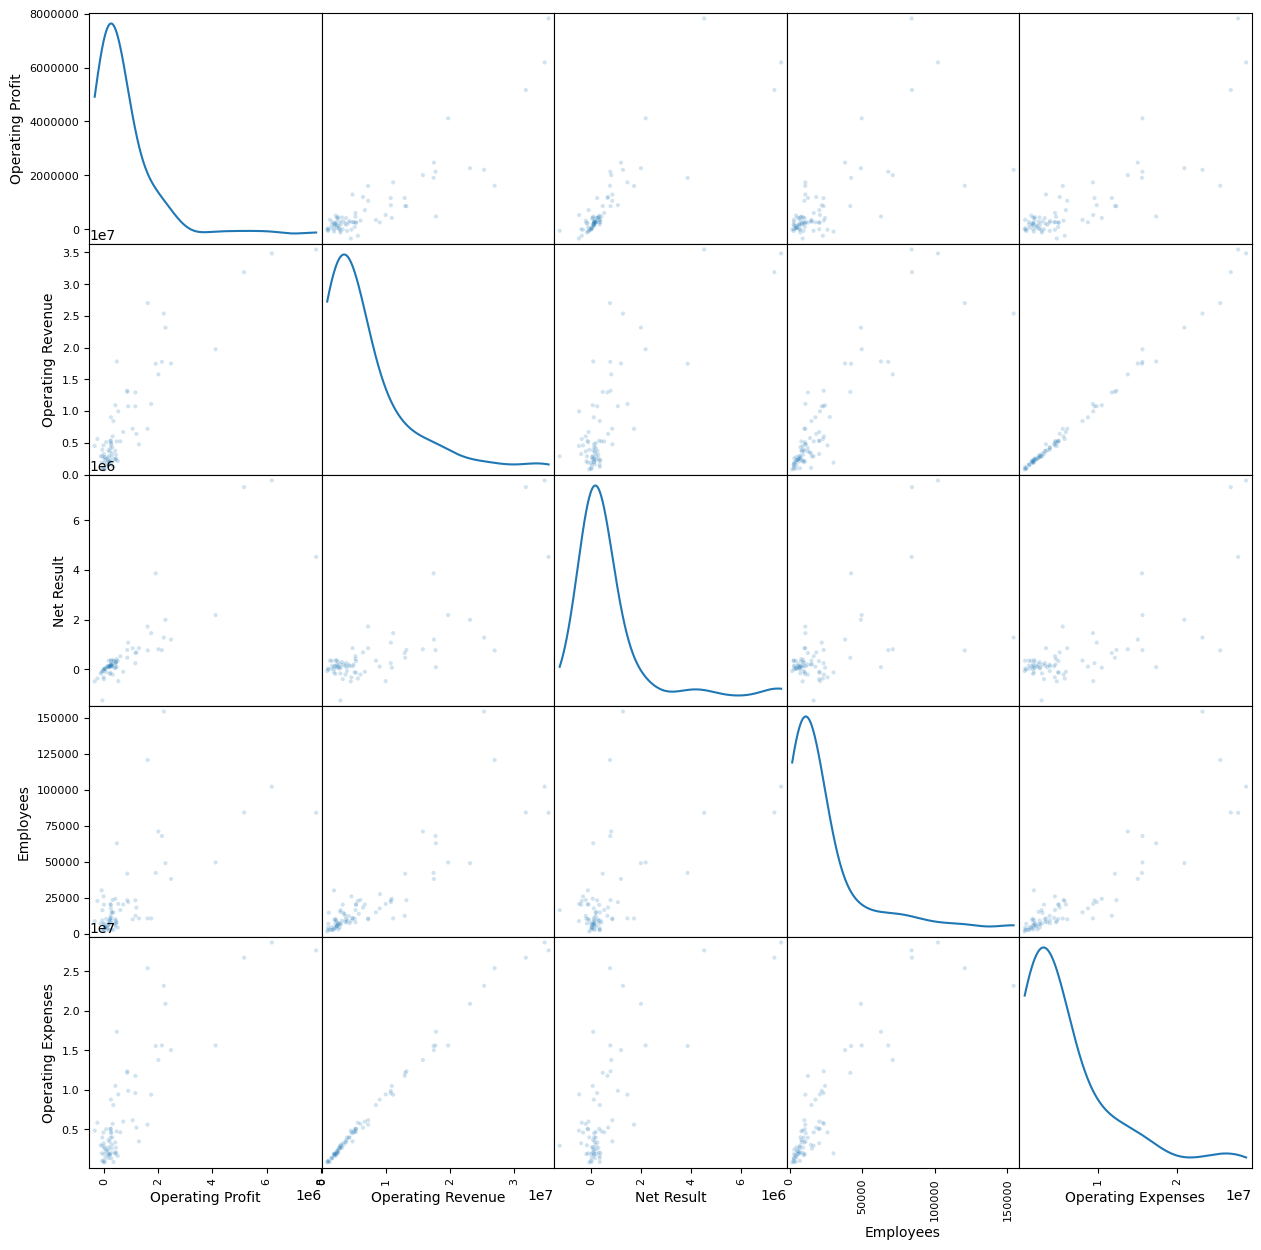

,Passengers Carried,Kilometres Flown,Aircraft Departures,Hours Flown,Passenger-Kilometres Flown,Available Seat-Kilometres,Tonne-Kilometres Performed,Passenger Load Factor,Operating Revenue,Operating Revenue Pax,Operating Expenses,Operating Profit,Net Result,Employees
Passengers Carried,1.000000,0.073832,0.949144,0.944990,0.871628,0.858072,0.754287,0.334936,0.825642,0.848959,0.792402,0.860070,0.707745,0.756106
Kilometres Flown,0.073832,1.000000,0.087157,0.093929,0.061251,0.055389,0.026651,0.127788,0.041829,0.060210,0.024503,0.090855,0.059431,0.027824
Aircraft Departures,0.949144,0.087157,1.000000,0.919790,0.768385,0.755304,0.636632,0.317825,0.722899,0.767680,0.684375,0.785242,0.624064,0.620388
Hours Flown,0.944990,0.093929,0.919790,1.000000,0.902619,0.895774,0.809039,0.278647,0.839725,0.882155,0.807054,0.862254,0.720183,0.685840
Passenger-Kilometres Flown,0.871628,0.061251,0.768385,0.902619,1.000000,0.997797,0.954233,0.252533,0.964994,0.970773,0.951932,0.897442,0.826705,0.856293
Available Seat-Kilometres,0.858072,0.055389,0.755304,0.895774,0.997797,1.000000,0.961658,0.204766,0.964691,0.969370,0.955358,0.885311,0.815177,0.856823
Tonne-Kilometres Performed,0.754287,0.026651,0.636632,0.809039,0.954233,0.961658,1.000000,0.206503,0.936939,0.926537,0.947389,0.783960,0.720500,0.826787
Passenger Load Factor,0.334936,0.127788,0.317825,0.278647,0.252533,0.204766,0.206503,1.000000,0.215421,0.235046,0.170986,0.246810,0.229781,0.145355
Operating Revenue,0.825642,0.041829,0.722899,0.839725,0.964994,0.964691,0.936939,0.215421,1.000000,0.993293,0.995457,0.881373,0.787546,0.878096
Operating Revenue Pax,0.848959,0.060210,0.767680,0.882155,0.970773,0.969370,0.926537,0.235046,0.993293,1.000000,0.986777,0.895381,0.815774,0.901677


In [42]:
from pandas.plotting import scatter_matrix

# Scatter plot matrix des variables quantitatives sous forme d'histogramme
scatter_matrix(airlines2015[["Operating Profit","Operating Revenue","Net Result","Employees","Operating Expenses"]], alpha=0.2, figsize=(15, 15))
plt.show()

# Scatter plot matrix des variables quantitatives sous forme de densité
scatter_matrix(airlines2015[["Operating Profit","Operating Revenue","Net Result","Employees","Operating Expenses"]], alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

airlines2015.corr(numeric_only=True)

**Q** Commenter les liens 2 à 2 de ces variables.

#### 2.2.2 Statistiques qualitatives

<AxesSubplot:xlabel='Year'>

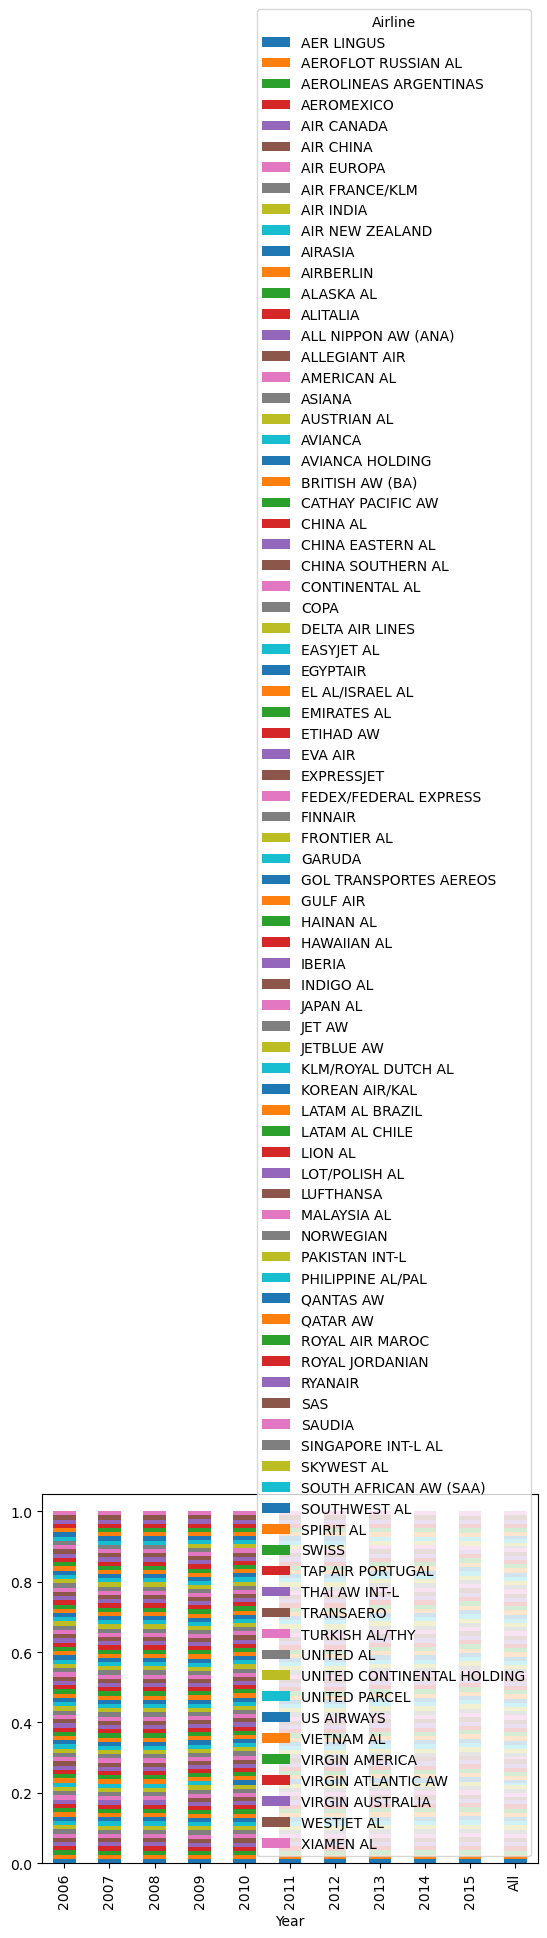

In [43]:
# Table de contingence entre 'Year' et 'Airline'
airline_year = pd.crosstab(airlines["Year"], airlines["Airline"], margins=True , normalize="index")

airline_year.plot.bar(stacked=True)

<hr style="height:2px" />

## 3 Analyse en composantes principales <a class="anchor" id="acp"></a>

Pour cette partie, on ne travaille qu'avec les variables quantitatives et en remplaçant les valeurs manquantes par la moyenne de la variable.

In [44]:
# On sélectionne uniquement les variables quantitatives
airlines2015etude=airlines2015.select_dtypes(include=['float64'])

# On remplace les valeurs manquantes par la moyenne des variables
airlines2015etude = airlines2015etude.fillna(airlines2015etude.mean())
airlines2015etude.head(11)

,Passengers Carried,Kilometres Flown,Aircraft Departures,Hours Flown,Passenger-Kilometres Flown,Available Seat-Kilometres,Tonne-Kilometres Performed,Passenger Load Factor,Operating Revenue,Operating Revenue Pax,Operating Expenses,Operating Profit,Net Result,Employees
Airline,,,,,,,,,,,,,,
AER LINGUS,10149000.0,1.040000e+05,72000.000000,1.732000e+05,17528000.0,21471000.0,1.826000e+06,81.6,1895000.0,1795000.0,1758000.0,137000.0,589500.0,4000.0
AEROFLOT RUSSIAN AL,26106000.0,4.680000e+05,206400.000000,5.946000e+05,74088000.0,93420000.0,7.290000e+06,79.3,6698000.0,5640000.0,5986000.0,712000.0,-105000.0,20404.0
AEROLINEAS ARGENTINAS,7464000.0,1.190000e+05,64600.000000,1.801000e+05,18299000.0,22883000.0,1.998000e+06,80.0,2084000.0,1700000.0,1861000.0,223000.0,-192000.0,10491.0
AEROMEXICO,10408000.0,1.840000e+05,85600.000000,2.945000e+05,25174000.0,31814000.0,2.777000e+06,79.1,2938000.0,2612000.0,2748000.0,190000.0,72000.0,6612.0
AIR CANADA,23618000.0,5.000000e+05,182400.000000,7.258000e+05,85478000.0,101340000.0,9.335000e+06,84.3,10746000.0,9624000.0,9587000.0,1159000.0,239000.0,23301.0
AIR CHINA,84151000.0,1.114000e+06,643800.000000,1.762400e+06,163536000.0,203880000.0,2.093800e+07,80.2,17500000.0,15253000.0,15027000.0,2473000.0,1194000.0,38149.0
AIR EUROPA,10221000.0,1.190000e+05,82200.000000,1.954000e+05,23180000.0,27550000.0,2.425000e+06,84.1,1874000.0,1802000.0,1870000.0,4000.0,-2000.0,2980.0
AIR FRANCE/KLM,49472000.0,6.600000e+05,370000.000000,1.000000e+06,141176000.0,167932000.0,1.686000e+07,84.1,17818000.0,14775000.0,17341000.0,477000.0,80000.0,62885.0
AIR INDIA,18611000.0,3.490000e+05,149600.000000,3.858000e+05,38169000.0,50531000.0,4.371000e+06,75.5,3238000.0,2401000.0,3237000.0,1000.0,-402000.0,20306.0


In [48]:
airlines2015quant=airlines2015etude.iloc[:,0:]
n = airlines2015quant.shape[0]
p = airlines2015quant.shape[1]
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# Réduction des variables
X = scale(airlines2015quant)
# Vérification du centrage et de la réduction de notre dataframe
print(np.mean(X,axis=0))
print(np.std(X,axis=0,ddof=0))

# Calcul de l'ACP
pca_airlines = PCA()
C_airlines = pca_airlines.fit_transform(X)

liste=['Comp.'+str(i) for i in range(1,len(airlines2015etude.columns)+1)]
Cdataframe=pd.DataFrame(C_airlines, columns=liste)
display(Cdataframe)

[-7.78510048e-18 -5.85574949e-17 -1.34377604e-16 -2.84325409e-17
 -1.35393052e-17 -2.30168188e-17 -8.52976226e-17  1.35393052e-15
  5.55111512e-17 -4.73875681e-18  1.73303106e-16 -1.18468920e-16
  6.76965259e-18 -4.19718461e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12,Comp.13,Comp.14
0,-2.249486,0.282022,-0.344609,-0.304731,-0.514273,0.440037,-0.099539,0.066865,-0.012974,-0.069212,0.006572,-0.067156,-0.003928,-0.015122
1,-0.334105,-0.145693,-0.027718,-0.049841,0.169942,-0.316616,0.222360,-0.085786,0.080852,-0.255091,-0.172396,0.139844,-0.013202,-0.006452
2,-2.352015,0.027488,-0.150399,-0.255483,-0.045770,0.253103,0.158902,-0.101049,0.043602,-0.121292,-0.149524,-0.052111,0.017729,-0.005951
3,-2.039155,-0.063675,-0.073057,-0.090595,-0.202197,0.140552,0.087445,-0.002072,-0.092436,-0.151912,-0.023517,-0.038316,-0.013699,-0.000371
4,0.626733,0.208655,-0.333691,-0.894888,0.021016,-0.243271,0.529986,0.032122,-0.362801,-0.339882,-0.104688,0.031441,0.035700,0.012237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,-2.393643,0.376759,-0.406326,-0.347487,-0.454597,0.373122,0.002552,-0.050200,-0.048364,-0.109336,-0.042533,-0.011920,-0.009731,-0.015212
78,-1.851778,-0.553287,0.292015,-0.243566,-0.373800,-0.058947,0.169364,-0.026265,-0.018992,-0.070743,-0.049880,0.018063,-0.053187,0.007338
79,-1.767560,-0.446099,0.214230,0.290367,0.063214,-0.064751,0.005794,0.171170,-0.029797,-0.231639,0.140498,-0.050058,-0.048968,0.007632
80,-1.159434,0.301146,-0.194116,0.294308,-0.093903,-0.129978,-0.207382,-0.350615,-0.238293,0.269530,-0.071446,-0.130553,0.029023,0.001879


### 3.1 Valeurs propres et choix du nombre de dimensions à garder

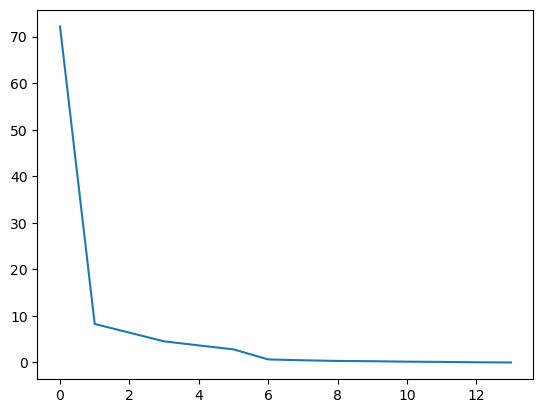

In [46]:
# Eboulis des valeurs propres
plt.plot(pca_airlines.explained_variance_ratio_*100) # pour l'avoir en pourcentage
plt.show()

**Q** Combien de dimensions peut-on utiliser pour expliquer au moins 95% de l'information totale?

[ 72.16621625  80.44620644  86.85549975  91.39436001  95.06497733
  97.88557851  98.55094475  99.02878729  99.36201709  99.63820872
  99.81818961  99.94466774  99.99556109 100.        ]


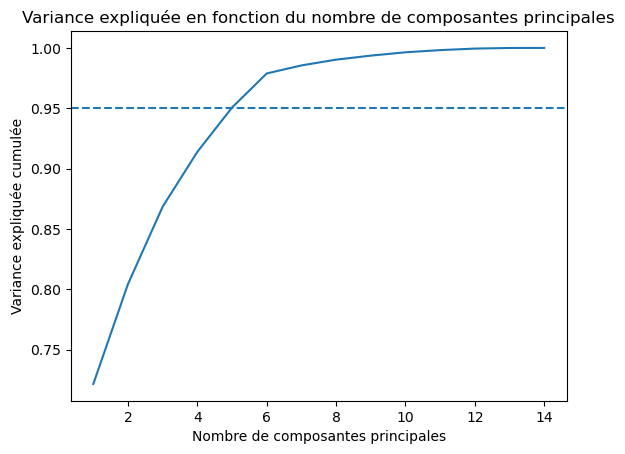

In [49]:
# Calcul de la variane expliquée cumulée en pourcentage
print(pca_airlines.explained_variance_ratio_.cumsum()*100)

# Cumul de variance expliquée
plt.plot(np.arange(1,p+1),pca_airlines.explained_variance_ratio_.cumsum())
plt.title("Variance expliquée en fonction du nombre de composantes principales")
plt.ylabel("Variance expliquée cumulée")
plt.xlabel("Nombre de composantes principales")
plt.axhline(y = 0.95, linestyle = 'dashed')
plt.show()

### 3.2 Représentation des individus

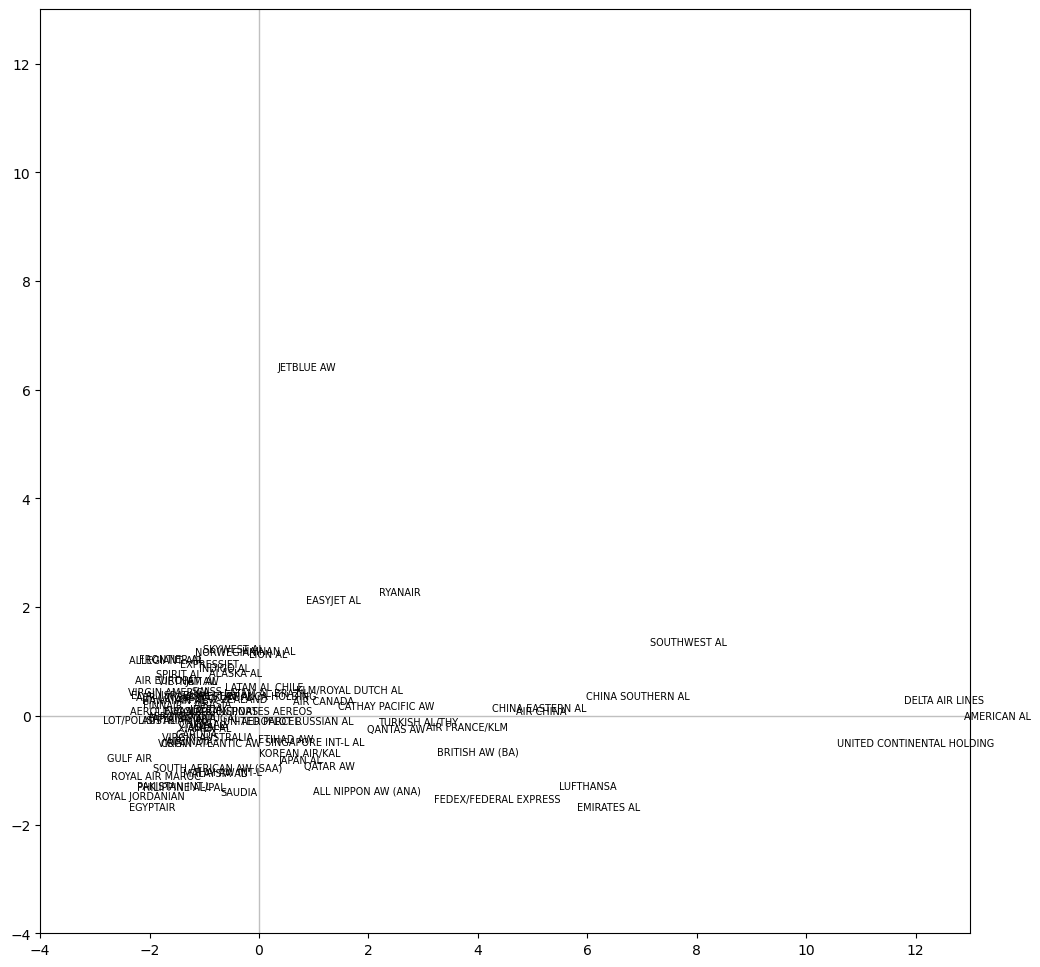

In [50]:
# Positionnement des individus dans le premier plan
limplot=[-4,13]
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(limplot[0],limplot[1]) 
axes.set_ylim(limplot[0],limplot[1]) 

for i in range(n):
    plt.annotate(airlines2015quant.index[i],(C_airlines[i,0],C_airlines[i,1]), fontsize=7) # fontsize par défaut met des label trop gros
    
plt.plot([limplot[0],limplot[1]],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[limplot[0],limplot[1]],color='silver',linestyle='-',linewidth=1)

plt.show()

**Q** Quels sont les individus qui, selon vous, contribuent le plus à l'axe 1? A l'axe 2?

#### 3.2.1 Contribution des individus aux axes

In [51]:
# Contributions aux axes
eigval = (n-1)/n*pca_airlines.explained_variance_
ctr = C_airlines**2/np.dot(np.array([np.ones(n)]).T,np.array([n*eigval]))

# étude de l'axe 1-2
contributionind = pd.DataFrame({'Index':airlines2015quant.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})
contributionind = contributionind.set_index('Index')

## Pour voir tout le tableau des contributions (limité par défaut)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
#    # more options can be specified also
#    print(contributionplan)

# Individus dont la contribution à la 1ère composante est supérieure à 10%
print(contributionind.loc[contributionind['CTR_1']>0.1])

                               CTR_1     CTR_2
Index                                         
AMERICAN AL                 0.200493  0.000050
DELTA AIR LINES             0.167601  0.000609
UNITED CONTINENTAL HOLDING  0.134905  0.003268


**Q** Quels sont les individus qui contribuent le plus à l'axe 2?

In [52]:
print(contributionind.loc[contributionind['CTR_2']>0.1])

               CTR_1     CTR_2
Index                         
JETBLUE AW  0.000132  0.426327


### 3.3 Représentation des variables

In [53]:
# corrélation variables-facteurs
corvar = pca_airlines.components_.T*np.dot(np.array([np.ones(p)]).T,np.array([np.sqrt(eigval)]))

#### 3.3.1 Etude du plan 1-2

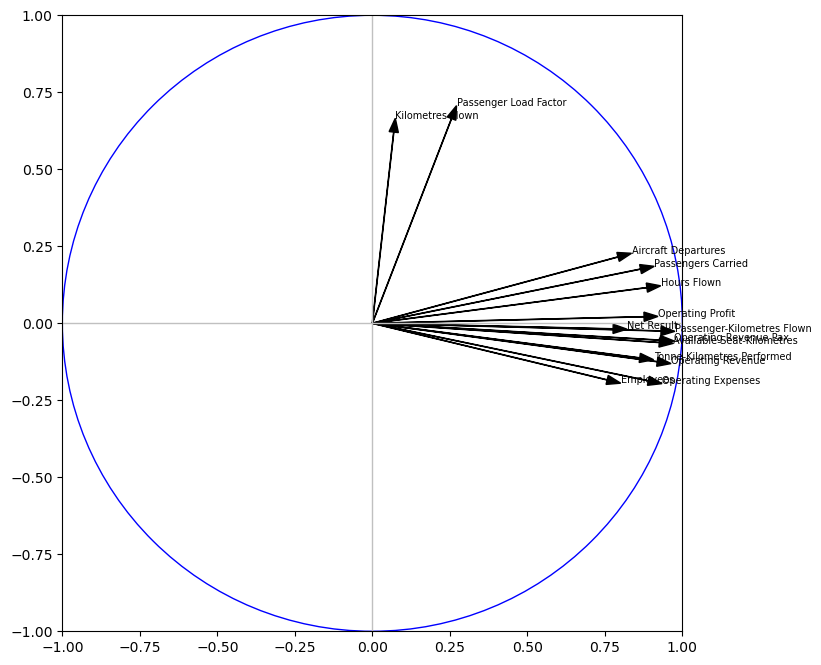



Variables dont la corrélation avec la 1ère composante est supérieure à 50%:


,COR_1,COR_2
Index,,
Passengers Carried,0.909221,0.184888
Aircraft Departures,0.835980,0.227245
Hours Flown,0.930175,0.121657
Passenger-Kilometres Flown,0.976205,-0.026132
Available Seat-Kilometres,0.970359,-0.065350
Tonne-Kilometres Performed,0.907255,-0.118237
Operating Revenue,0.963671,-0.130802
Operating Revenue Pax,0.973607,-0.057527
Operating Expenses,0.934414,-0.195956




Variables dont la corrélation avec la 2ème composante est supérieure à 50%:


,COR_1,COR_2
Index,,
Kilometres Flown,0.074010,0.665489
Passenger Load Factor,0.271554,0.706580


In [54]:
# Cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# Affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(airlines2015quant.columns[j],(corvar[j,0],corvar[j,1]), fontsize=7)
    plt.arrow(0,0,corvar[j,0],corvar[j,1],color='black',length_includes_head=True, head_width=.03)
    
# Ajout des axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# Ajout du cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.show()

# Tableau des corrélations sur l'axe 1-2
correlation12 = pd.DataFrame({'Index':airlines2015quant.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]})
correlation12 = correlation12.set_index('Index')

print()
print()
print(color.BOLD + color.BLUE + "Variables dont la corrélation avec la 1ère composante est supérieure à 50%:" + color.END)
display(correlation12.loc[correlation12['COR_1']>0.5])

print()
print()
print(color.BOLD + color.BLUE + "Variables dont la corrélation avec la 2ème composante est supérieure à 50%:" + color.END)
display(correlation12.loc[correlation12['COR_2']>0.5])

**Q** Quels sont, selon vous, les variables qui contribuent le plus à l'axe 1? à l'axe 2?

#### 3.3.2 Etude du plan 2-3

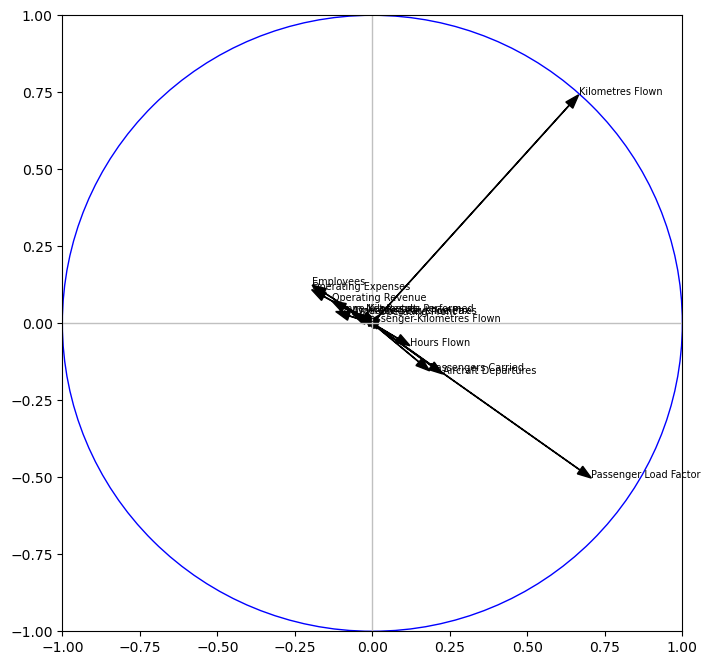



Variables dont la corrélation avec la 1ère composante est supérieure à 50%:


,COR_2,COR_3
Index,,
Kilometres Flown,0.665489,0.741775
Passenger Load Factor,0.706580,-0.502629




Variables dont la corrélationa avec la 2ème composante est supérieure à 50%:


,COR_2,COR_3
Index,,
Kilometres Flown,0.665489,0.741775


In [55]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
for j in range(p):
    plt.annotate(airlines2015quant.columns[j],(corvar[j,1],corvar[j,2]), fontsize=7)
    plt.arrow(0,0,corvar[j,1],corvar[j,2],color='black',length_includes_head=True, head_width=.03)
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
plt.show()

# Tableau des corrélations sur l'axe 2-3
correlation23 = pd.DataFrame({'Index':airlines2015quant.columns,'COR_2':corvar[:,1],'COR_3':corvar[:,2]})
correlation23 = correlation23.set_index('Index')

print()
print()
print(color.BOLD + color.BLUE + "Variables dont la corrélation avec la 1ère composante est supérieure à 50%:" + color.END)
display(correlation23.loc[correlation23['COR_2']>0.5])

print()
print()
print(color.BOLD + color.BLUE + "Variables dont la corrélationa avec la 2ème composante est supérieure à 50%:" + color.END)
display(correlation23.loc[correlation23['COR_3']>0.5])

#### 3.3.3 Contribution des variables aux axes

In [56]:
# Contribution variables pour la construction des axes
contribvar = corvar**2*np.dot(np.array([np.ones(p)]).T,np.array([1/(eigval)]))

# étude de l'axe 1-2
contributionvar = pd.DataFrame({'Index':airlines2015quant.columns,'CTR_1':contribvar[:,0],'CTR_2':contribvar[:,1]})
contributionvar = contributionvar.set_index('Index')

# Variables dont la contribution à la 1ère composante est supérieure à 5%
print(contributionvar.loc[contributionvar['CTR_1']>0.05])
print()
print()

# Variables dont la contribution à la 2ème composante est supérieure à 20%
print(contributionvar.loc[contributionvar['CTR_2']>0.2])

                               CTR_1     CTR_2
Index                                         
Passengers Carried          0.081823  0.029489
Aircraft Departures         0.069172  0.044548
Hours Flown                 0.085638  0.012768
Passenger-Kilometres Flown  0.094323  0.000589
Available Seat-Kilometres   0.093197  0.003684
Tonne-Kilometres Performed  0.081470  0.012060
Operating Revenue           0.091917  0.014759
Operating Revenue Pax       0.093822  0.002855
Operating Expenses          0.086421  0.033125
Operating Profit            0.084031  0.000429
Net Result                  0.066813  0.000317
Employees                   0.063532  0.032633


                          CTR_1     CTR_2
Index                                    
Kilometres Flown       0.000542  0.382053
Passenger Load Factor  0.007299  0.430690


<hr style="height:2px" />

## 4. Classification <a class="anchor" id="cah"></a>

### 4.1 K-Means

In [57]:
from sklearn.cluster  import  KMeans
from  sklearn.metrics  import confusion_matrix
###
# airline
#clust=KMeans(n_clusters=5)
Nb_clusters=5
clust_airlines=KMeans(n_clusters=Nb_clusters)
###
clust_airlines.fit(X)
groupes_kmeans=clust_airlines.labels_

centers = pd.DataFrame(clust_airlines.cluster_centers_, columns=airlines2015quant.columns.values.tolist())
display(centers)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Passengers Carried,Kilometres Flown,Aircraft Departures,Hours Flown,Passenger-Kilometres Flown,Available Seat-Kilometres,Tonne-Kilometres Performed,Passenger Load Factor,Operating Revenue,Operating Revenue Pax,Operating Expenses,Operating Profit,Net Result,Employees
0,1.450787,-0.029435,1.467814,1.478260,1.418883,1.459105,1.514838,0.200637,1.680879,1.498208,1.748975,1.019863,0.400477,2.014028
1,-0.469767,-0.141188,-0.399674,-0.470290,-0.531087,-0.531014,-0.543984,-0.213024,-0.553158,-0.542510,-0.546543,-0.421047,-0.343578,-0.436462
2,3.067834,0.135861,2.748220,3.469623,3.618816,3.522685,2.945658,0.819264,3.415895,3.539566,3.164177,4.206042,4.370356,2.509265
3,0.109170,8.976189,0.246466,0.263821,0.007311,-0.038989,-0.279559,0.906337,-0.124930,0.011673,-0.245964,0.293076,0.064787,-0.139130
4,0.234041,-0.097960,0.055829,0.142741,0.348989,0.349519,0.479708,0.371826,0.338093,0.361000,0.336966,0.073257,0.107645,-0.021670


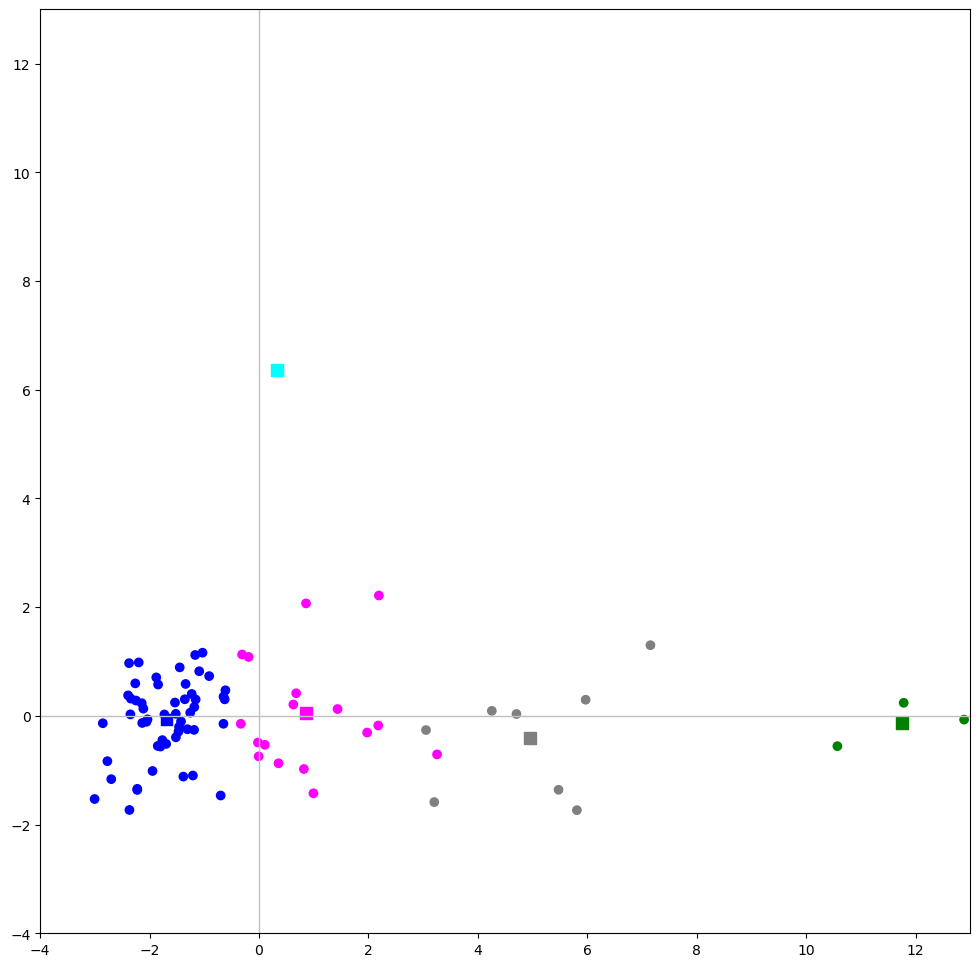

In [58]:
## Repésentation des individus dans les coordonnées de l'acp.
limplot=[-4,13]
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(limplot[0],limplot[1]) 
axes.set_ylim(limplot[0],limplot[1])

## Repésentation des individus dans les coordonnées de l'acp.
plt.plot([limplot[0],limplot[1]],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[limplot[0],limplot[1]],color='silver',linestyle='-',linewidth=1)
plt.scatter(C_airlines[:,0], C_airlines[:,1], c=[couleur_plot[element] for element in groupes_kmeans]) 

## Représentation des centres des classes sur le même graphique (forme carré et plus gros)
couleur=list(set(groupes_kmeans))
Cgroup_kmeans_moy = Cdataframe.groupby(groupes_kmeans).mean()
plt.scatter(Cgroup_kmeans_moy.iloc[:,0], Cgroup_kmeans_moy.iloc[:,1], c=couleur_plot[0:Nb_clusters], marker='s',s=70)
plt.show()

In [59]:
## Même représentation qu'au dessus, mais en 3D, dans une nouvelle fenêtre interactive
#%matplotlib qt
#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure(1, figsize=(8, 6))
#ax = Axes3D(fig, elev=-150, azim=110)
#ax.scatter(C_airlines[:, 0], C_airlines[:, 1], C_airlines[:, 2], c=[couleur_plot[element] for element in groupes_kmeans],cmap=plt.cm.Paired)
#ax.scatter(Cgroup_kmeans_moy.iloc[:,0], Cgroup_kmeans_moy.iloc[:,1], c=couleur_plot[0:Nb_clusters], marker='s',s=70)
#ax.set_title("ACP: trois premieres composantes")
#ax.set_xlabel("Comp1")
#ax.w_xaxis.set_ticklabels([])
#ax.set_ylabel("Comp2")
#ax.w_yaxis.set_ticklabels([])
#ax.set_zlabel("Comp3")

### 4.2 Classification ascendante hiérarchique

#### 4.2.1 Méthode de Ward
Construction du dendrogramme

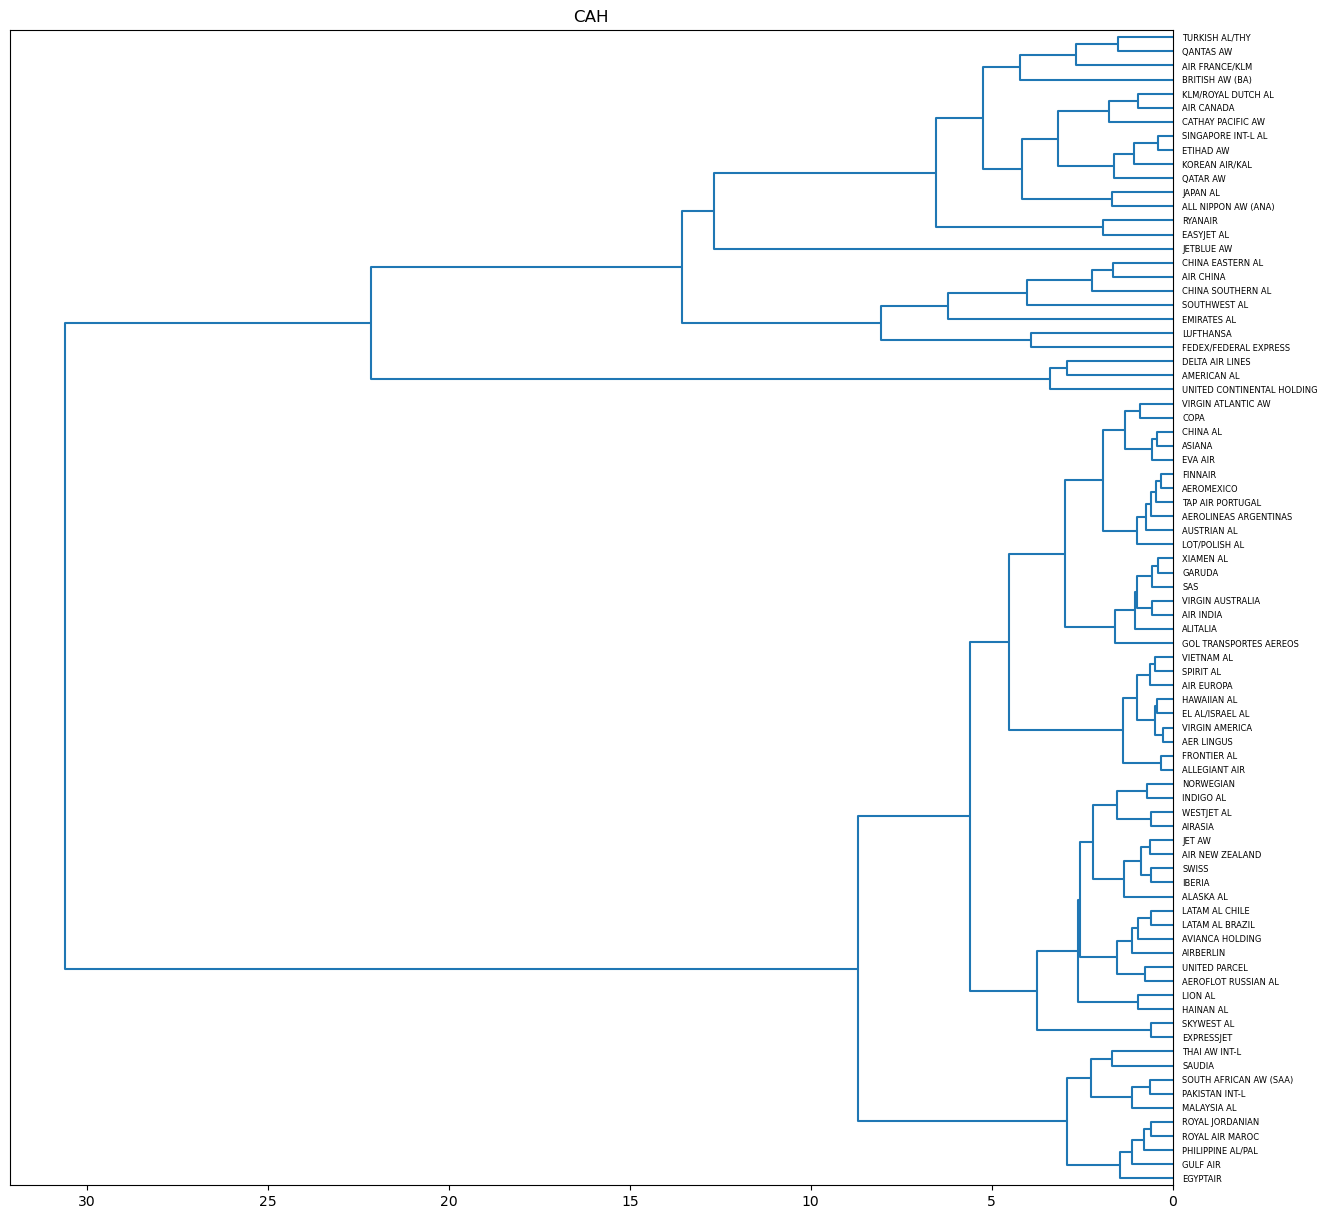

In [60]:
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
#générer la matrice des liens
Z_ward = linkage(X,method='ward',metric='euclidean')
#affichage du dendrogramme
fig, axes = plt.subplots(figsize=(15,15))
plt.title("CAH")
dendrogram(Z_ward,labels=airlines2015quant.index,orientation='left',color_threshold=0)
plt.show()

**Q** Combien de classes choisiriez-vous?

Pour comparer avec le "K-Means", nous choisissons de matérialiser la classification précédente avec 5 classes.

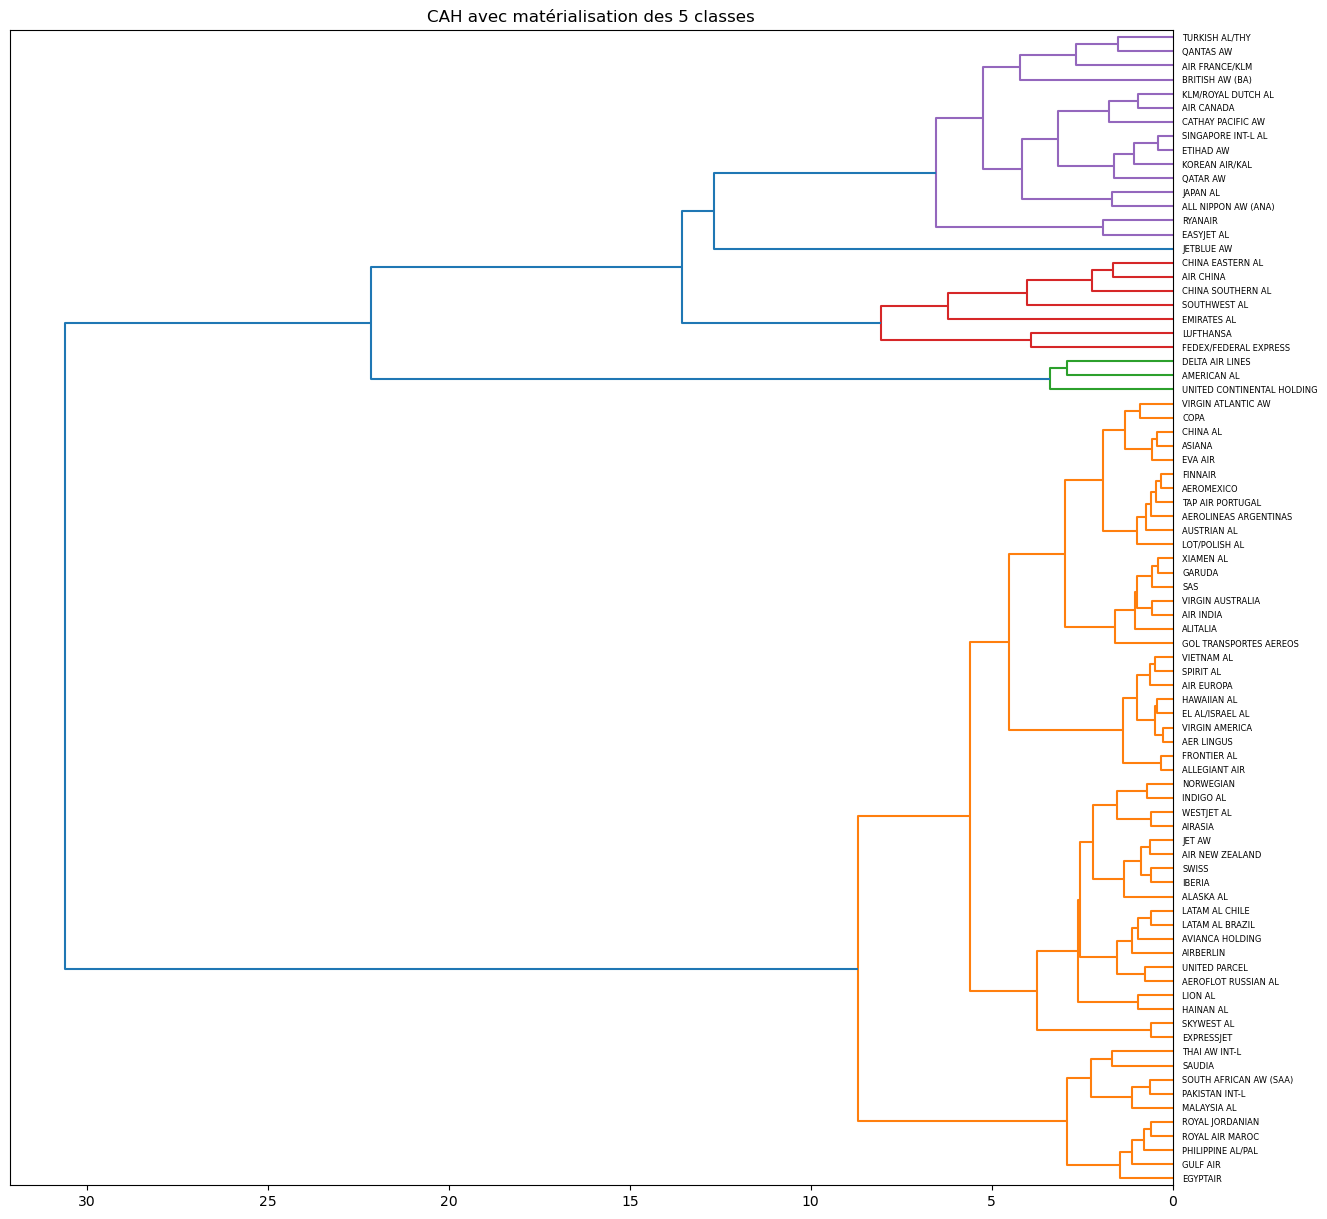

[1 1 1 1 4 3 1 4 1 1 1 1 1 1 4 1 2 1 1 1 4 4 1 3 3 1 2 4 1 1 3 4 1 1 3 1 1
 1 1 1 1 1 1 1 4 1 5 4 4 1 1 1 1 3 1 1 1 1 4 4 1 1 4 1 1 4 1 1 3 1 1 1 1 4
 2 1 1 1 1 1 1 1]
                   Airline
1               AER LINGUS
1                   GARUDA
1   GOL TRANSPORTES AEREOS
1                 GULF AIR
1               WESTJET AL
..                     ...
4           KOREAN AIR/KAL
4          BRITISH AW (BA)
4               EASYJET AL
4                QANTAS AW
5               JETBLUE AW

[82 rows x 1 columns]


In [61]:
# Matérialisation des 5 classes (hauteur t = 10)
fig, axes = plt.subplots(figsize=(15,15))
plt.title('CAH avec matérialisation des 5 classes')
dendrogram(Z_ward,labels=airlines2015quant.index,orientation='left',color_threshold=10)
plt.show()
# Découpage à la hauteur t = 10 ==> identifiants de 5 groupes obtenus
groupes_cah_ward= fcluster(Z_ward,t=10,criterion='distance')
print(groupes_cah_ward)
# Index triés des groupes
idg_ward= np.argsort(groupes_cah_ward)
# Affichage des observations et leurs groupes
print(pd.DataFrame(airlines2015quant.index[idg_ward],groupes_cah_ward[idg_ward]))

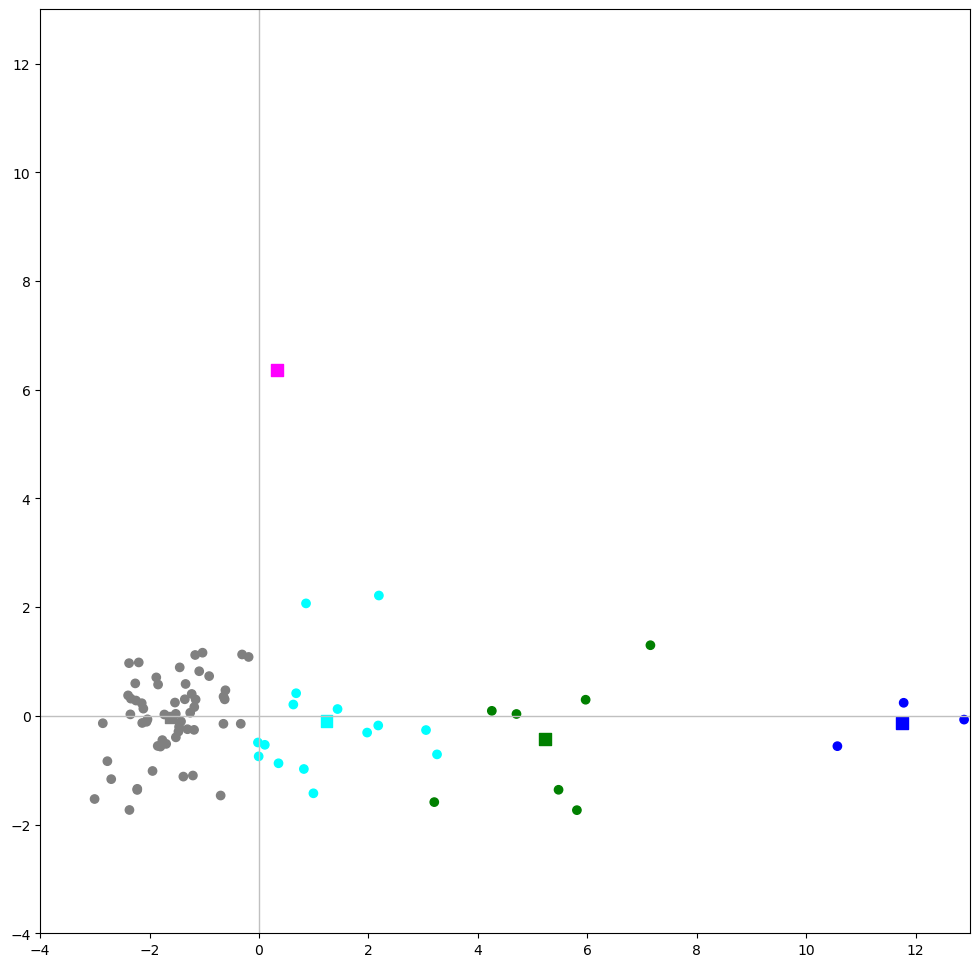

In [62]:
limplot=[-4,13]
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(limplot[0],limplot[1])
axes.set_ylim(limplot[0],limplot[1])

# Repésentation des individus dans les coordonnées de l'acp
#  (attention, les couleurs ne correspondent pas aux couleurs du dendrogramme) 
plt.plot([limplot[0],limplot[1]],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[limplot[0],limplot[1]],color='silver',linestyle='-',linewidth=1)
plt.scatter(C_airlines[:,0], C_airlines[:,1], c=[couleur_plot[element-1] for element in groupes_cah_ward])
couleur=list(set(groupes_cah_ward))
Cgroup_cah_ward_moy = Cdataframe.groupby(groupes_cah_ward).mean()
plt.scatter(Cgroup_cah_ward_moy.iloc[:,0], Cgroup_cah_ward_moy.iloc[:,1], c=couleur_plot[0:Nb_clusters], marker='s',s=70)
plt.show()

**Q** Quelles sont les différences/ressemblances avec la méthode des K-Means précédente?

Pour les prochains critères, nous allons utiliser 5 classes afin de comparer les différentes classifications. A vous de répondre à la même question précédente sur les différentes et ressemblances de classification.

#### 4.2.2 Critère du saut minimal

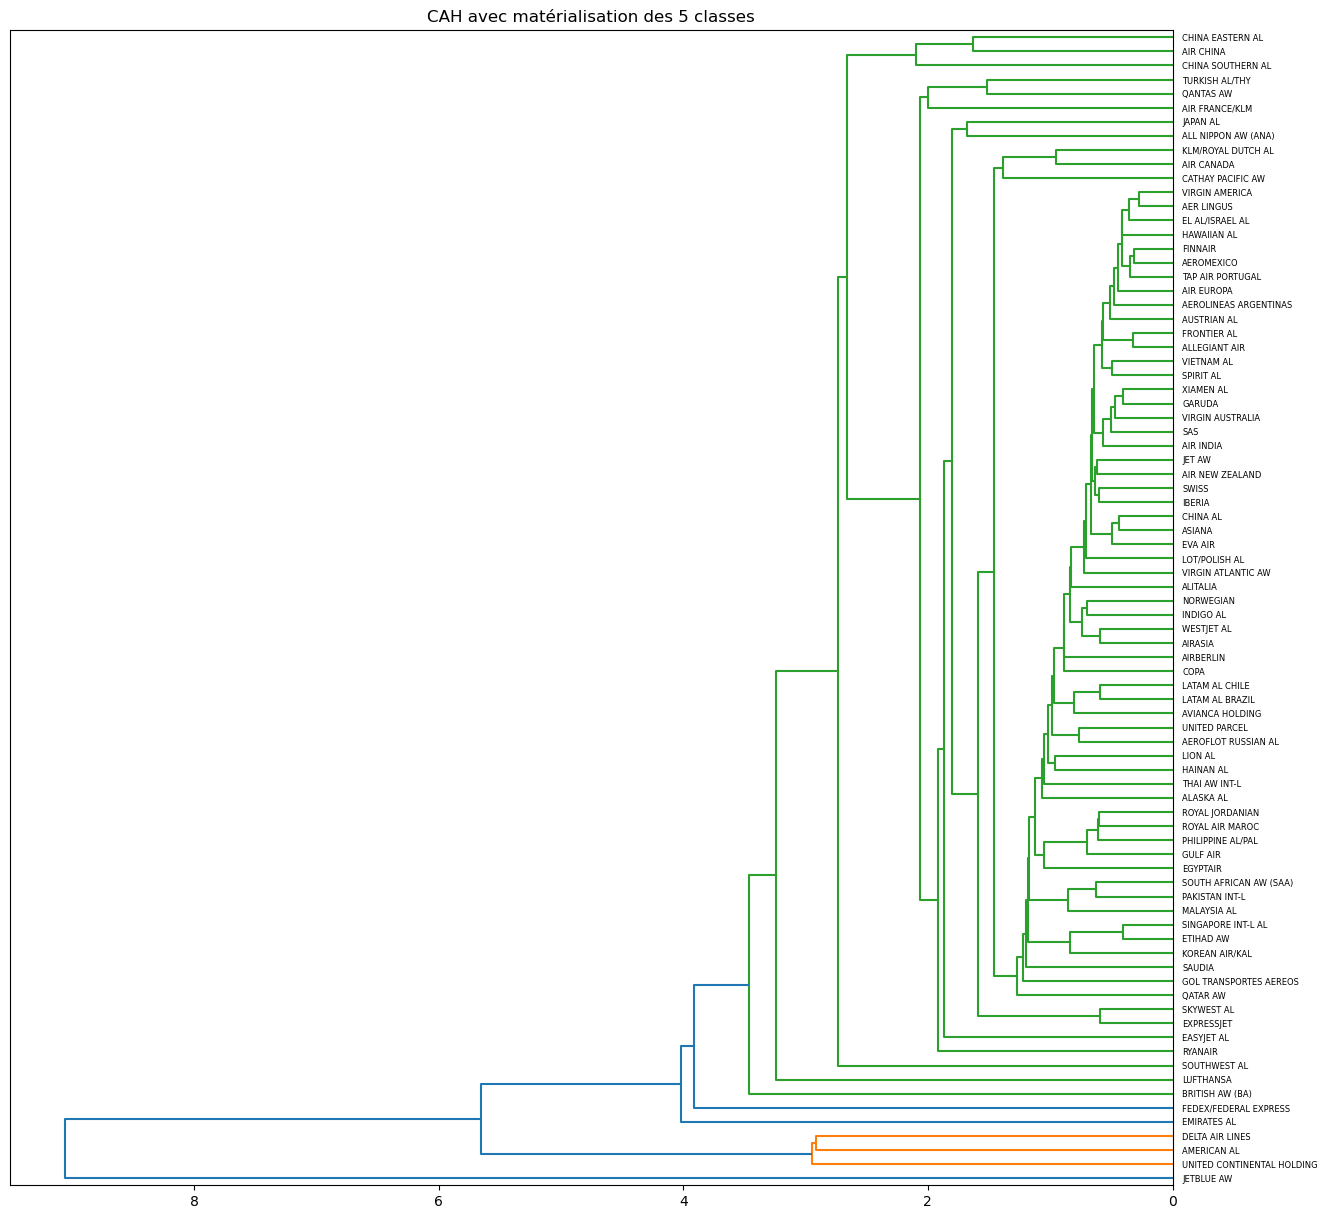

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 4 2 2 2 3 2 2
 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2]
                       Airline
1                  AMERICAN AL
1              DELTA AIR LINES
1   UNITED CONTINENTAL HOLDING
2                   AER LINGUS
2                    QANTAS AW
..                         ...
2                     CHINA AL
2                    XIAMEN AL
3        FEDEX/FEDERAL EXPRESS
4                  EMIRATES AL
5                   JETBLUE AW

[82 rows x 1 columns]


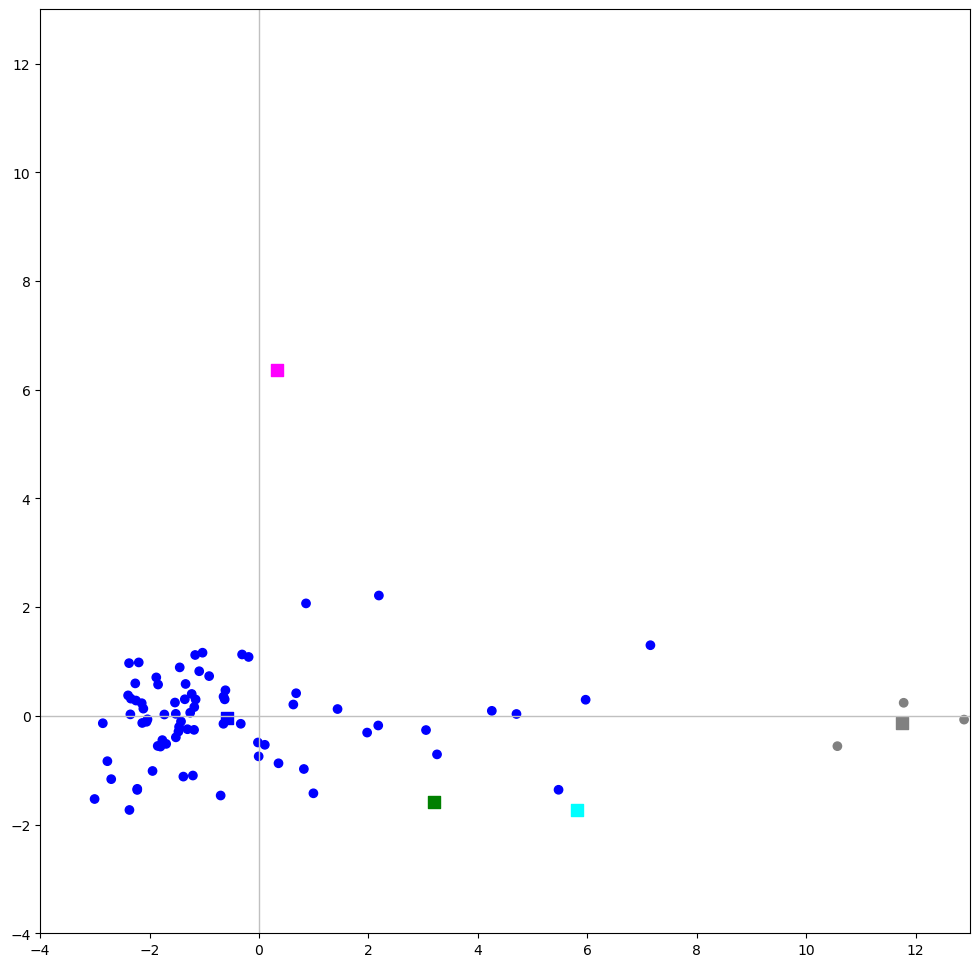

In [63]:
#générer la matrice des liens
Z_single = linkage(X,method='single',metric='euclidean')
#matérialisation des 4 classes (hauteur t = 7)
fig, axes = plt.subplots(figsize=(15,15))
plt.title('CAH avec matérialisation des 5 classes')
dendrogram(Z_single,labels=airlines2015quant.index,orientation='left',color_threshold=3.6)
plt.show()
#découpage à la hauteur t = 3.7 ==> identifiants de 5 groupes obtenus
groupes_cah_single= fcluster(Z_single,t=3.7,criterion='distance')
print(groupes_cah_single)
#index triés des groupes
idg_single= np.argsort(groupes_cah_single)
#affichage des observations et leurs groupes
print(pd.DataFrame(airlines2015quant.index[idg_single],groupes_cah_single[idg_single]))

fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(limplot[0],limplot[1]) 
axes.set_ylim(limplot[0],limplot[1]) 

# Repésentation des individus dans les coordonnées de l'acp
#  (attention, les couleurs ne correspondent pas aux couleurs du dendrogramme) 
plt.plot([limplot[0],limplot[1]],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[limplot[0],limplot[1]],color='silver',linestyle='-',linewidth=1)
plt.scatter(C_airlines[:,0], C_airlines[:,1], c=[couleur_plot[element-1] for element in groupes_cah_single]) 
couleur=list(set(groupes_cah_single))
Cgroup_cah_single_moy = Cdataframe.groupby(groupes_cah_single).mean()
plt.scatter(Cgroup_cah_single_moy.iloc[:,0], Cgroup_cah_single_moy.iloc[:,1], c=couleur_plot[0:Nb_clusters], marker='s',s=70)
plt.show()

*Différence/ressemblance entre méthodes*

*Réponse:*   
Methode non adapté avec les données et la distance euclidienne. Ici on a 2 classes qui sont reduites a 1 seul point.

#### 4.2.3 Critère du diamètre

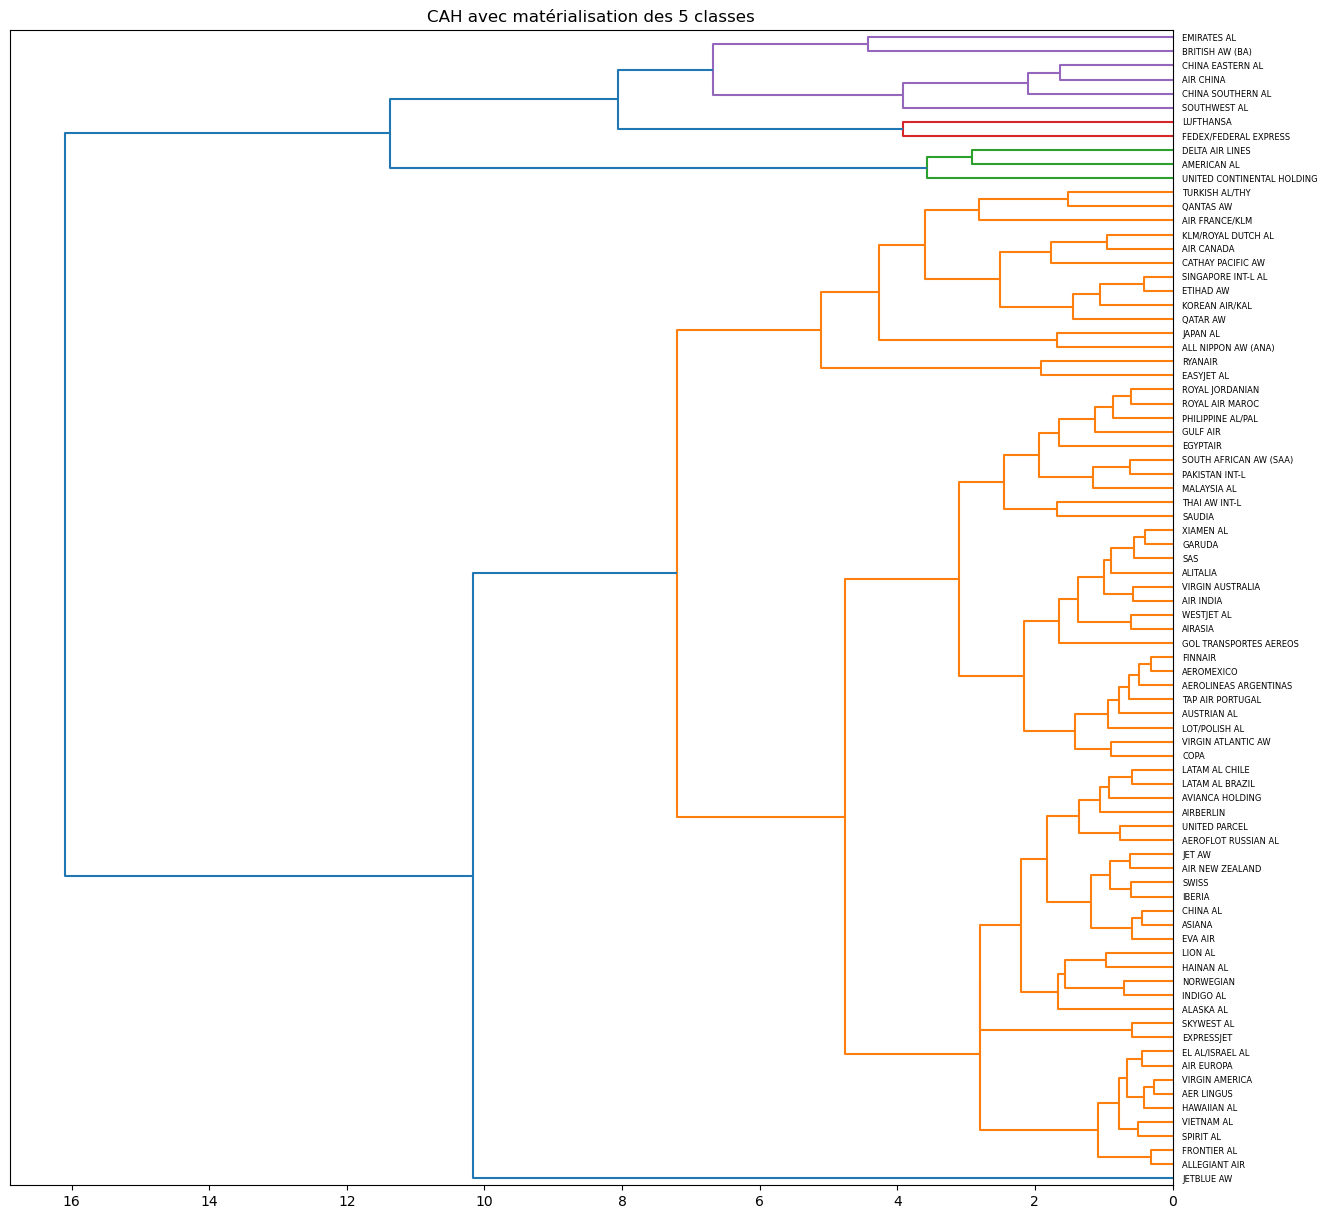

[1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 3 1 1 1 5 1 1 5 5 1 3 1 1 1 5 1 1 1 4 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1
 3 1 1 1 1 1 1 1]
              Airline
1          AER LINGUS
1   PHILIPPINE AL/PAL
1      PAKISTAN INT-L
1           NORWEGIAN
1         MALAYSIA AL
..                ...
5         EMIRATES AL
5           AIR CHINA
5   CHINA SOUTHERN AL
5    CHINA EASTERN AL
5     BRITISH AW (BA)

[82 rows x 1 columns]


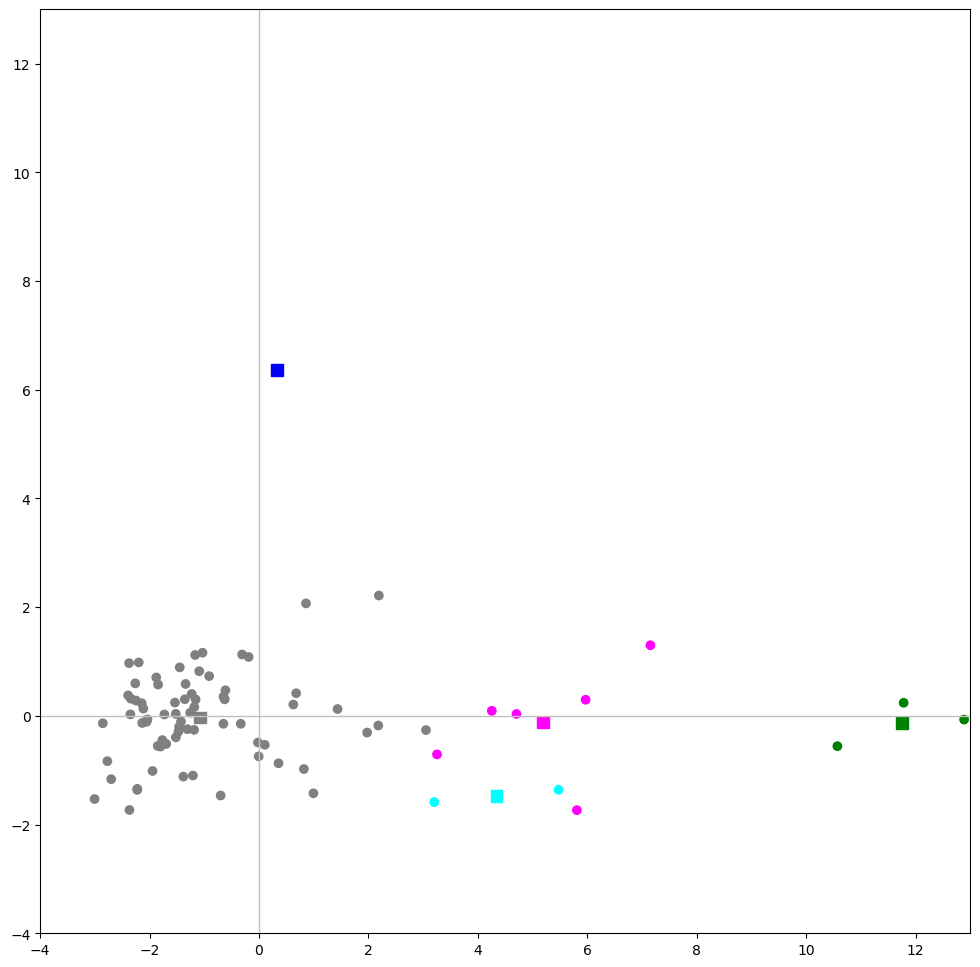

In [64]:
#générer la matrice des liens
Z_complete = linkage(X,method='complete',metric='euclidean')
##affichage du dendrogramme
#fig, axes = plt.subplots(figsize=(15,15))
#plt.title("CAH")
#dendrogram(Z,labels=airlines2015quant.index,orientation='left',color_threshold=0)
#plt.show()
#matérialisation des 4 classes (hauteur t = 7)
fig, axes = plt.subplots(figsize=(15,15))
plt.title('CAH avec matérialisation des 5 classes')
dendrogram(Z_complete,labels=airlines2015quant.index,orientation='left',color_threshold=7.4)
plt.show()
#découpage à la hauteur t = 7 ==> identifiants de 5 groupes obtenus
groupes_cah_complete= fcluster(Z_complete,t=7.4,criterion='distance')
print(groupes_cah_complete)
#index triés des groupes
idg_complete= np.argsort(groupes_cah_complete)
#affichage des observations et leurs groupes
print(pd.DataFrame(airlines2015quant.index[idg_complete],groupes_cah_complete[idg_complete]))

fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(limplot[0],limplot[1]) 
axes.set_ylim(limplot[0],limplot[1]) 
# Repésentation des individus dans les coordonnées de l'acp
#  (attention, les couleurs ne correspondent pas aux couleurs du dendrogramme) 
plt.plot([limplot[0],limplot[1]],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[limplot[0],limplot[1]],color='silver',linestyle='-',linewidth=1)
plt.scatter(C_airlines[:,0], C_airlines[:,1], c=[couleur_plot[element-1] for element in groupes_cah_complete]) 
couleur=list(set(groupes_cah_complete))
Cgroup_cah_complete_moy = Cdataframe.groupby(groupes_cah_complete).mean()
plt.scatter(Cgroup_cah_complete_moy.iloc[:,0], Cgroup_cah_complete_moy.iloc[:,1], c=couleur_plot[0:Nb_clusters], marker='s',s=70)
plt.show()

*Différence/ressemblance entre méthodes*

*Réponse:*   Bulle de meme diametre, si la distance est infenieur a la hauteur alors c'est englober dans la classe

#### 4.2.4 Critère de la moyenne

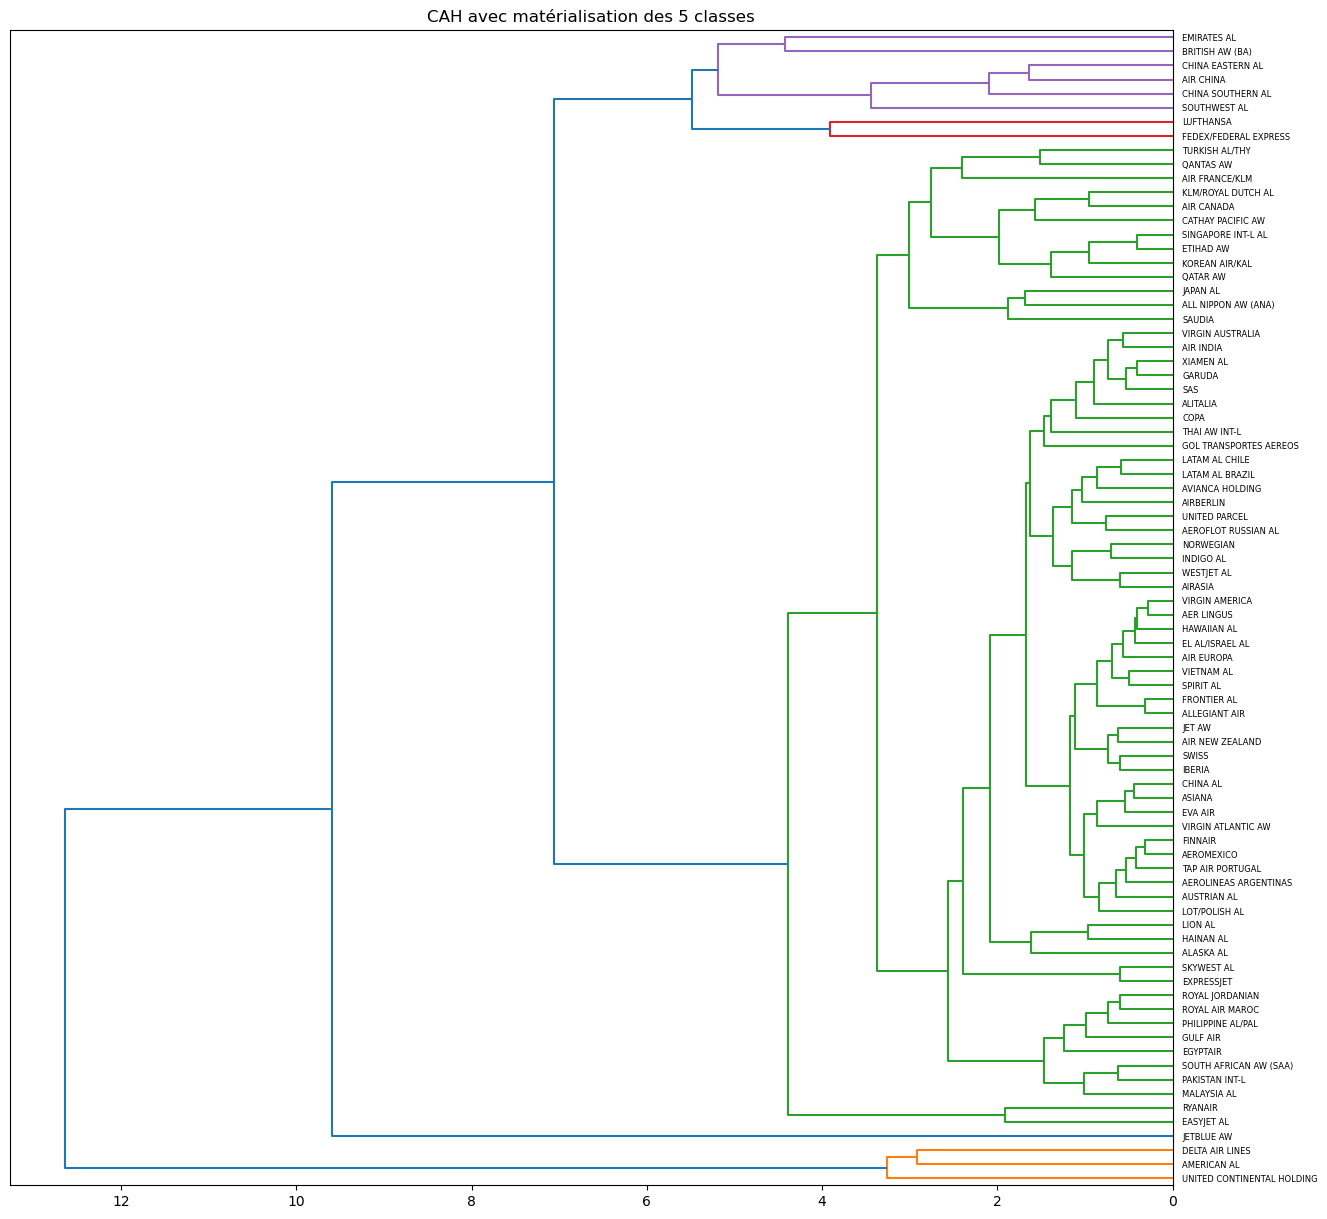

[2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 1 2 2 2 4 2 2 4 4 2 1 2 2 2 4 2 2 2 3 2 2
 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2
 1 2 2 2 2 2 2 2]
                       Airline
1                  AMERICAN AL
1              DELTA AIR LINES
1   UNITED CONTINENTAL HOLDING
2                   AER LINGUS
2            PHILIPPINE AL/PAL
..                         ...
4            CHINA SOUTHERN AL
4             CHINA EASTERN AL
4                    AIR CHINA
4                  EMIRATES AL
5                   JETBLUE AW

[82 rows x 1 columns]


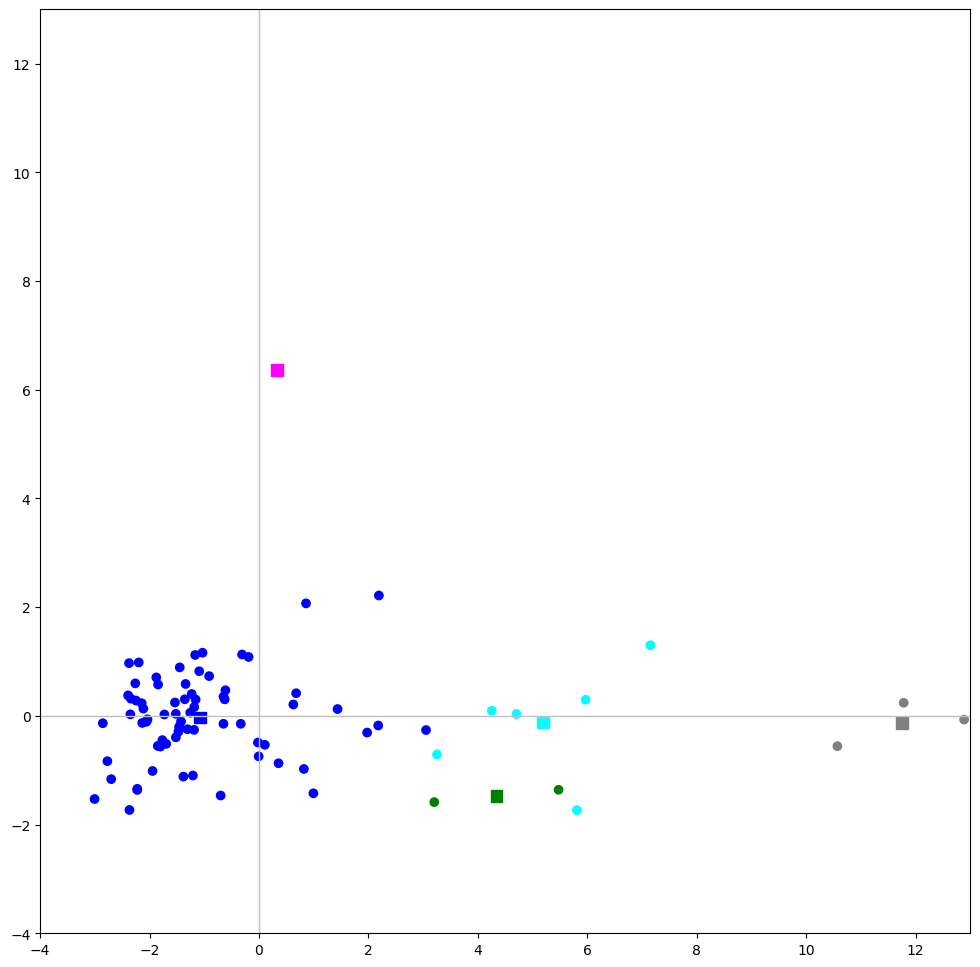

In [65]:
#générer la matrice des liens
Z_average = linkage(X,method='average',metric='euclidean')
##affichage du dendrogramme
#fig, axes = plt.subplots(figsize=(15,15))
#plt.title("CAH")
#dendrogram(Z,labels=airlines2015quant.index,orientation='left',color_threshold=0)
#plt.show()
#matérialisation des 4 classes (hauteur t = 5)
fig, axes = plt.subplots(figsize=(15,15))
plt.title('CAH avec matérialisation des 5 classes')
dendrogram(Z_average,labels=airlines2015quant.index,orientation='left',color_threshold=5.4)
plt.show()
#découpage à la hauteur t = 5 ==> identifiants de 5 groupes obtenus
groupes_cah_average= fcluster(Z_average,t=5.4,criterion='distance')
print(groupes_cah_average)
#index triés des groupes
idg_average= np.argsort(groupes_cah_average)
#affichage des observations et leurs groupes
print(pd.DataFrame(airlines2015quant.index[idg_average],groupes_cah_average[idg_average]))

fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(limplot[0],limplot[1]) 
axes.set_ylim(limplot[0],limplot[1]) 
# Repésentation des individus dans les coordonnées de l'acp
#  (attention, les couleurs ne correspondent pas aux couleurs du dendrogramme) 
plt.plot([limplot[0],limplot[1]],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[limplot[0],limplot[1]],color='silver',linestyle='-',linewidth=1)
plt.scatter(C_airlines[:,0], C_airlines[:,1], c=[couleur_plot[element-1] for element in groupes_cah_average]) 
couleur=list(set(groupes_cah_average))
Cgroup_cah_average_moy = Cdataframe.groupby(groupes_cah_average).mean()
plt.scatter(Cgroup_cah_average_moy.iloc[:,0], Cgroup_cah_average_moy.iloc[:,1], c=couleur_plot[0:Nb_clusters], marker='s',s=70)
plt.show()

*Différence/ressemblance entre méthodes*

*Réponse:*   

<br>       

**Q** Au vu de toutes les classifications effectuées et de l'ACP, quelle autre analyse pourrait-on faire?

**Q (bonus)** Créer une fonction qui permet de fournir en sortie la classification (graphiques, groupe,...) avec comme paramètre d'entrée: la méthode (ward, single...) et le nombre de classe.

### 4.3 Interprétation des classes

Choix de la méthode de classification pour l'interprétation

In [66]:
## Choix des classes pour les individus en fonction de la méthode
########
#groupes=groupes_kmeans
groupes=groupes_cah_ward
#groupes=groupes_cah_single
#groupes=groupes_cah_complete
#groupes=groupes_cah_average

groupes_moy = Cdataframe.groupby(groupes).mean()

#### 4.3.1 Par les variables

In [67]:
# Moyenne par variable
m = airlines2015quant.mean()
nbvar=len(m)
# Ecart-type par variable
sd = airlines2015quant.std()

# Dataframe conditionnellement aux groupes
airlines2015group = airlines2015quant.groupby(groupes)

# Effectifs conditionnels
airlines2015group_n= airlines2015group.size()
#print(airlines2015group_n)
N=sum(airlines2015group_n)

# Moyennes conditionnelles
airlines2015group_moy= airlines2015group.mean()
# Ecart-type conditionnelles
airlines2015group_std= airlines2015group.std()

# Calcul du V-test
a=(airlines2015group_moy-m)/sd
b=np.dot(np.array([((airlines2015group_n*(N-1))/(N-airlines2015group_n))**(0.5)]).T,
         np.full(shape=(1,nbvar),fill_value=1))
vtest=a*b

from scipy.stats import norm
def pvaleur(X):
    return 2*norm.cdf(-abs(X))

for i in range(vtest.shape[0]):
    df = pd.DataFrame({'vtest': vtest.iloc[i,:], 'moyenne-conditionnelle': airlines2015group_moy.iloc[i,:],
                   'moyenne totale': m, 'variance conditionnelle': airlines2015group_std.iloc[i,:],
                       'variance totale': sd,'pvaleur' : pvaleur(vtest.iloc[i,:])},
                      index = vtest.columns)
    dfselection = df.loc[df['pvaleur']<0.05,:]
#    dfselection = df
    print(color.BOLD + color.BLUE + "Classe " + str(i+1) + " (n=" + str(airlines2015group_n.iloc[i]) + ")"+ color.END)
    display(dfselection.sort_values(by = 'pvaleur'))
    print()
    print()


Classe 1 (n=56)


,vtest,moyenne-conditionnelle,moyenne totale,variance conditionnelle,variance totale,pvaleur
Operating Revenue,-6.955402,3.248196e+06,7.386604e+06,1.600375e+06,7.858883e+06,3.515587e-12
Operating Expenses,-6.883693,3.378633e+06,6.832689e+06,1.825275e+06,6.627623e+06,5.832052e-12
Tonne-Kilometres Performed,-6.837436,4.247401e+06,8.309068e+06,2.532797e+06,7.846225e+06,8.062283e-12
Operating Revenue Pax,-6.791407,2.611993e+06,5.820700e+06,1.349771e+06,6.240511e+06,1.110450e-11
Available Seat-Kilometres,-6.723161,4.152641e+07,8.242888e+07,1.897380e+07,8.035739e+07,1.778240e-11
Passenger-Kilometres Flown,-6.697093,3.288417e+07,6.663435e+07,1.513389e+07,6.656403e+07,2.126056e-11
Hours Flown,-5.856413,3.684136e+05,6.262325e+05,1.841839e+05,5.814774e+05,4.729711e-09
Passengers Carried,-5.829011,1.792046e+07,3.168966e+07,1.011163e+07,3.120066e+07,5.575678e-09
Employees,-5.453887,1.078852e+04,2.205953e+04,6.850564e+03,2.729647e+04,4.928059e-08
Operating Profit,-5.345817,2.689001e+05,8.094013e+05,3.115192e+05,1.335465e+06,9.001034e-08




Classe 2 (n=3)


,vtest,moyenne-conditionnelle,moyenne totale,variance conditionnelle,variance totale,pvaleur
Net Result,7.618018,6.492000e+06,5.895000e+05,1.707950e+06,1.358888e+06,2.576007e-14
Operating Profit,7.331599,6.392067e+06,8.094013e+05,1.337908e+06,1.335465e+06,2.274219e-13
Passenger-Kilometres Flown,6.307999,3.060440e+08,6.663435e+07,1.327905e+07,6.656403e+07,2.826659e-10
Operating Revenue Pax,6.169858,2.777430e+07,5.820700e+06,1.400193e+06,6.240511e+06,6.835127e-10
Available Seat-Kilometres,6.140433,3.637713e+08,8.242888e+07,1.828780e+07,8.035739e+07,8.229660e-10
Hours Flown,6.047939,2.631400e+06,6.262325e+05,3.061251e+05,5.814774e+05,1.467104e-09
Operating Revenue,5.954286,3.406753e+07,7.386604e+06,1.906858e+06,7.858883e+06,2.612095e-09
Operating Expenses,5.515514,2.767540e+07,6.832689e+06,9.622278e+05,6.627623e+06,3.477621e-08
Passengers Carried,5.347576,1.268227e+08,3.168966e+07,2.756482e+07,3.120066e+07,8.913979e-08
Tonne-Kilometres Performed,5.134610,3.128000e+07,8.309068e+06,1.065925e+06,7.846225e+06,2.827302e-07




Classe 3 (n=7)


,vtest,moyenne-conditionnelle,moyenne totale,variance conditionnelle,variance totale,pvaleur
Employees,5.702575,7.867257e+04,2.205953e+04,4.286260e+04,2.729647e+04,1.180110e-08
Operating Expenses,4.839470,1.849796e+07,6.832689e+06,4.584539e+06,6.627623e+06,1.301858e-06
Operating Revenue,4.728214,2.090101e+07,7.386604e+06,4.310581e+06,7.858883e+06,2.265030e-06
Aircraft Departures,4.405834,6.567857e+05,2.566273e+05,3.563854e+05,2.497266e+05,1.053777e-05
Hours Flown,4.364299,1.549200e+06,6.262325e+05,5.889805e+05,5.814774e+05,1.275312e-05
Passengers Carried,4.307115,8.056495e+07,3.168966e+07,3.757013e+07,3.120066e+07,1.653979e-05
Tonne-Kilometres Performed,4.302948,2.058815e+07,8.309068e+06,8.417018e+06,7.846225e+06,1.685403e-05
Available Seat-Kilometres,4.139012,2.033944e+08,8.242888e+07,7.343263e+07,8.035739e+07,3.488043e-05
Operating Revenue Pax,4.115477,1.516140e+07,5.820700e+06,4.789250e+06,6.240511e+06,3.863797e-05
Passenger-Kilometres Flown,3.991473,1.632643e+08,6.663435e+07,5.680680e+07,6.656403e+07,6.566417e-05




Classe 4 (n=15)


,vtest,moyenne-conditionnelle,moyenne totale,variance conditionnelle,variance totale,pvaleur
Tonne-Kilometres Performed,2.705257,1.329353e+07,8.309068e+06,4.365101e+06,7.846225e+06,0.006825
Operating Revenue Pax,2.200447,9.045333e+06,5.820700e+06,2.970686e+06,6.240511e+06,0.027775
Operating Expenses,2.178703,1.022351e+07,6.832689e+06,3.248662e+06,6.627623e+06,0.029354
Available Seat-Kilometres,2.129876,1.226199e+08,8.242888e+07,2.976258e+07,8.035739e+07,0.033182
Passenger-Kilometres Flown,2.110700,9.962687e+07,6.663435e+07,2.556828e+07,6.656403e+07,0.034798
Operating Revenue,2.098202,1.125880e+07,7.386604e+06,3.207916e+06,7.858883e+06,0.035887




Classe 5 (n=1)


,vtest,moyenne-conditionnelle,moyenne totale,variance conditionnelle,variance totale,pvaleur
Kilometres Flown,8.921289,55734000.0,1.149494e+06,NaN,6.118455e+06,4.608942e-19


**Q** Interpréter les résultats.

#### 4.3.2 Par les composantes principales

In [68]:
# Moyenne par composantes principales
Cm = Cdataframe.mean()
nbvar=len(Cm)
# Ecart-type par composantes principales
Csd = Cdataframe.std()

# Dataframe conditionnellement aux groupes
Cgroup = Cdataframe.groupby(groupes)

# Effectifs conditionnels
Cgroup_n= Cgroup.size()
N=sum(Cgroup_n)

# Moyennes conditionnelles
Cgroup_moy= Cgroup.mean()
# Ecart-type conditionnelles
Cgroup_std= Cgroup.std()

# Calcul du V-test
Ca=(Cgroup_moy-Cm)/Csd
Cb=np.dot(np.array([((Cgroup_n*(N-1))/(N-Cgroup_n))**(0.5)]).T,
         np.full(shape=(1,nbvar),fill_value=1))
Cvtest=Ca*Cb

for i in range(Cvtest.shape[0]):
    df = pd.DataFrame({'vtest': Cvtest.iloc[i,:], 'moyenne-conditionnelle': Cgroup_moy.iloc[0,:],
                   'moyenne totale': Cm,'variance-conditionnelle': Cgroup_std.iloc[0,:],
                   'variance totale': Csd, 'pvaleur' : pvaleur(Cvtest.iloc[i,:])},
                      index = Cvtest.columns)
    dfselection = df.loc[df['pvaleur']<0.05,:]
    print(color.BOLD + color.BLUE + "Classe " + str(i+1) + " (n=" + str(Cgroup_n.iloc[i]) + ")"+ color.END)
    #print(i)
    display(dfselection.sort_values(by = 'pvaleur'))
    print()
    print()


Classe 1 (n=56)


,vtest,moyenne-conditionnelle,moyenne totale,variance-conditionnelle,variance totale,pvaleur
Comp.1,-6.685055,-1.618641,-1.218537e-16,0.675013,3.198125,2.308373e-11
Comp.6,2.049877,0.098124,-5.111088e-17,0.307662,0.632265,4.037646e-02




Classe 2 (n=3)


,vtest,moyenne-conditionnelle,moyenne totale,variance-conditionnelle,variance totale,pvaleur
Comp.1,6.442462,-1.618641,-1.218537e-16,0.675013,3.198125,1.175510e-10
Comp.5,-3.546579,-0.056950,1.827806e-17,0.363592,0.721270,3.902683e-04
Comp.6,2.546305,0.098124,-5.111088e-17,0.307662,0.632265,1.088701e-02




Classe 3 (n=7)


,vtest,moyenne-conditionnelle,moyenne totale,variance-conditionnelle,variance totale,pvaleur
Comp.5,4.646677,-0.056950,1.827806e-17,0.363592,0.721270,0.000003
Comp.1,4.491880,-1.618641,-1.218537e-16,0.675013,3.198125,0.000007
Comp.14,-2.493803,-0.000517,-1.008044e-17,0.018877,0.025082,0.012638




Classe 4 (n=15)


,vtest,moyenne-conditionnelle,moyenne totale,variance-conditionnelle,variance totale,pvaleur
Comp.6,-3.206148,0.098124,-5.111088e-17,0.307662,0.632265,0.001345
Comp.8,2.894117,-0.025854,1.590868e-17,0.154068,0.260238,0.003802
Comp.11,2.385126,-0.018176,-8.123583e-18,0.127425,0.159714,0.017073
Comp.13,-1.998082,0.009493,-2.583046e-17,0.080651,0.084930,0.045708




Classe 5 (n=1)


,vtest,moyenne-conditionnelle,moyenne totale,variance-conditionnelle,variance totale,pvaleur
Comp.3,6.725277,-0.095303,-2.081668e-17,0.577137,0.953089,1.752585e-11
Comp.2,5.876436,-0.027887,1.286234e-17,0.738679,1.083287,4.191932e-09


**Q** Interpréter les résultats.

#### 4.3.3 Par les individus

In [69]:
# Calcul des parangons par classe
# Calcul des individus les plus éloignés des centres des autres classes par classe 
#      (on prend le minimum des distances avec tous les autres centres de classes)

import scipy
tempo = scipy.spatial.distance.cdist(Cdataframe, groupes_moy, metric='euclidean')
tempo=pd.DataFrame(tempo, index=airlines2015etude.index)

i=0
parangon_ind = []
distance_ind = []
for valeur in Cgroup.indices.values():
    tempobis=tempo.iloc[valeur,:]
    parangon=tempobis.iloc[:,i]
    del tempobis[i]
    tempobisbis=tempobis.iloc[:,:]
    distance=np.transpose(tempobisbis).min()
    parangon_ind.append([parangon.sort_values()])
    distance_ind.append([distance.sort_values(ascending=False)])
    i=i+1

print(color.BOLD + color.BLUE + "PARANGON" + color.END)
for j in Cgroup.indices.keys():
    print(color.BOLD + color.BLUE + "Classe " + str(j) + " (n=" + str(Cgroup_n.iloc[j-1]) + ")"+ color.END)
    parangon_groupes=pd.DataFrame(parangon_ind[j-1],index=["Distance"])
    display(parangon_groupes)
    
print()
print(color.BOLD + color.BLUE + "DISTANCE MAX" + color.END)
for k in Cgroup.indices.keys():
    print(color.BOLD + color.BLUE + "Classe " + str(k) + " (n=" + str(Cgroup_n.iloc[k-1]) + ")"+ color.END)
    distance_groupes=pd.DataFrame(distance_ind[k-1],index=["Distance"])
    display(distance_groupes)

PARANGON
Classe 1 (n=56)


Airline,AIR NEW ZEALAND,AEROMEXICO,TAP AIR PORTUGAL,FINNAIR,ASIANA,CHINA AL,VIRGIN AUSTRALIA,XIAMEN AL,EVA AIR,GARUDA,...,ROYAL AIR MAROC,PHILIPPINE AL/PAL,PAKISTAN INT-L,EXPRESSJET,HAINAN AL,SKYWEST AL,LION AL,SAUDIA,EGYPTAIR,ROYAL JORDANIAN
Distance,0.502361,0.524265,0.537156,0.631055,0.633905,0.700223,0.703263,0.730256,0.738807,0.745485,...,1.988101,2.056082,2.082223,2.104577,2.153173,2.238177,2.257055,2.348207,2.55551,2.584385


Classe 2 (n=3)


Airline,AMERICAN AL,DELTA AIR LINES,UNITED CONTINENTAL HOLDING
Distance,1.551221,1.934904,1.951328


Classe 3 (n=7)


Airline,CHINA EASTERN AL,AIR CHINA,CHINA SOUTHERN AL,LUFTHANSA,EMIRATES AL,SOUTHWEST AL,FEDEX/FEDERAL EXPRESS
Distance,1.456777,1.691374,2.143199,2.555947,3.927597,3.932421,4.921696


Classe 4 (n=15)


Airline,AIR CANADA,KLM/ROYAL DUTCH AL,QANTAS AW,SINGAPORE INT-L AL,ETIHAD AW,QATAR AW,TURKISH AL/THY,KOREAN AIR/KAL,CATHAY PACIFIC AW,JAPAN AL,ALL NIPPON AW (ANA),AIR FRANCE/KLM,EASYJET AL,BRITISH AW (BA),RYANAIR
Distance,1.185187,1.311158,1.374866,1.4814,1.49823,1.627685,1.672865,1.702558,1.7097,2.060381,2.445716,2.597455,2.891689,3.384539,3.454181


Classe 5 (n=1)


Airline,JETBLUE AW
Distance,0.0



DISTANCE MAX
Classe 1 (n=56)


Airline,ROYAL JORDANIAN,EGYPTAIR,ROYAL AIR MAROC,GULF AIR,LOT/POLISH AL,PAKISTAN INT-L,PHILIPPINE AL/PAL,ALLEGIANT AIR,FRONTIER AL,VIRGIN AMERICA,...,IBERIA,SWISS,WESTJET AL,LION AL,HAINAN AL,AVIANCA HOLDING,LATAM AL BRAZIL,LATAM AL CHILE,UNITED PARCEL,AEROFLOT RUSSIAN AL
Distance,4.920811,4.538539,4.420455,4.366219,4.19394,4.186768,4.120593,4.02065,3.802137,3.797558,...,2.670628,2.639797,2.633858,2.288977,2.288028,2.261811,2.183508,2.110635,1.98991,1.713735


Classe 2 (n=3)


Airline,AMERICAN AL,DELTA AIR LINES,UNITED CONTINENTAL HOLDING
Distance,8.301981,7.165522,6.563713


Classe 3 (n=7)


Airline,SOUTHWEST AL,FEDEX/FEDERAL EXPRESS,EMIRATES AL,CHINA SOUTHERN AL,LUFTHANSA,AIR CHINA,CHINA EASTERN AL
Distance,6.006458,5.705482,5.590462,5.43542,5.417488,3.737025,3.659264


Classe 4 (n=15)


Airline,RYANAIR,BRITISH AW (BA),CATHAY PACIFIC AW,EASYJET AL,TURKISH AL/THY,ALL NIPPON AW (ANA),QANTAS AW,QATAR AW,KLM/ROYAL DUTCH AL,AIR FRANCE/KLM,AIR CANADA,JAPAN AL,SINGAPORE INT-L AL,KOREAN AIR/KAL,ETIHAD AW
Distance,4.955851,4.106921,3.825901,3.713666,3.527913,3.50496,3.382851,3.013189,2.870278,2.775034,2.606357,2.538501,2.316396,2.242464,2.142827


Classe 5 (n=1)


Airline,JETBLUE AW
Distance,9.249354


**Q** Interpréter les résultats.